# 3803ICT Big Data Analysis Assignment 

### Tyler Waugh and Long Nguyen


## Import libraries

In [122]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
# Ignore warnings
import warnings
warnings.simplefilter('ignore')
# Set sns style
sns.set()
sns.set_style("whitegrid")
# Retina screen configuration
%config InlineBackend.figure_format ='retina'
# Interactive
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Set up back end
# %matplotlib notebook

%matplotlib inline

## PART 1 - Data Preparation and Preprocessing

## 1. Steps used for data preparation and preprocessing
### 1.1 Importing data and check top rows
The data was imported using the pandas read_csv function to be ready for prepocessing and cleaning

In [2]:
# Read in data
df = pd.read_csv('./data.csv')
# Check data types
print(df.dtypes)
df.head(3)

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object


Id                                              Title  \
0  37404348                           Casual Stock Replenisher   
1  37404337                           Casual Stock Replenisher   
2  37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   

               Company                      Date               Location  \
0          Aldi Stores  2018-10-07T00:00:00.000Z                 Sydney   
1          Aldi Stores  2018-10-07T00:00:00.000Z  Richmond & Hawkesbury   
2  LB Creative Pty Ltd  2018-10-07T00:00:00.000Z               Brisbane   

                          Area              Classification  SubClassification  \
0  North West & Hills District  Retail & Consumer Products  Retail Assistants   
1                          NaN  Retail & Consumer Products  Retail Assistants   
2          CBD & Inner Suburbs  Retail & Consumer Products  Retail Assistants   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   

   LowestSalary  HighestSalary JobType  
0             0             30     NaN  
1             0             30     NaN  
2             0             30     NaN

### 1.2 Convert data types, check for missing/unique values, and range of quantitive attributes
* We can see that most of the columns were already in an appropriate data format, with only the date of the job postings requiring conversion.


In [3]:
# Check for missing values in columns and print results
print('MISSING VALUES (Counts):\nTitle:\t\t\t', df[df['Title'].isna()].shape[0],
      '\nCompany:\t\t', df[df['Company'].isna()].shape[0],
      '\nDate:\t\t\t', df[df['Date'].isna()].shape[0],
      '\nLocation:\t\t', df[df['Location'].isna()].shape[0],
      '\nArea:\t\t\t', df[df['Area'].isna()].shape[0],
      '\nClassification:\t\t', df[df['Classification'].isna()].shape[0],
      '\nSubClassification:\t', df[df['SubClassification'].isna()].shape[0],
      '\nRequirement:\t\t', df[df['Requirement'].isna()].shape[0],
      '\nFullDescription:\t', df[df['FullDescription'].isna()].shape[0],
      '\nLowestSalary:\t\t', df[df['LowestSalary'].isna()].shape[0],
      '\nHighestSalary:\t\t', df[df['HighestSalary'].isna()].shape[0],
      '\nJobType:\t\t', df[df['JobType'].isna()].shape[0], sep='')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

# Check if already converted
# print('\n\nConverted Types:')
# df.dtypes

MISSING VALUES (Counts):
Title:			0
Company:		12004
Date:			0
Location:		121248
Area:			195819
Classification:		121248
SubClassification:	121248
Requirement:		7
FullDescription:	16175
LowestSalary:		0
HighestSalary:		0
JobType:		16098


In [4]:
# Check unique values for date column
df['Date'].describe()

count                        318477
unique                          163
top       2018-10-17 00:00:00+00:00
freq                          13059
first     2018-10-01 00:00:00+00:00
last      2019-03-13 00:00:00+00:00
Name: Date, dtype: object

In [5]:
df['LowestSalary'].describe()

count    318477.000000
mean         65.813544
std          51.063125
min           0.000000
25%          30.000000
50%          60.000000
75%         100.000000
max         200.000000
Name: LowestSalary, dtype: float64

In [6]:
df['HighestSalary'].describe()

count    318477.000000
mean        114.432342
std         177.594941
min          30.000000
25%          40.000000
50%          70.000000
75%         120.000000
max         999.000000
Name: HighestSalary, dtype: float64

In [7]:
df['JobType'].unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

* We can see that there are a lot of missing values for Location, Areas, Classification, and Sub-Classification but we are not sure if the entire rows are valuable information for analysis later. Therefore, we'll only delete the rows if the ananlysis needs to focus on that part

### 1.3 Removing Unnecessary Columns/Rows
The ID column was removed as it doesn't have any meaningful purpose, being only the ID number for the job advertisement. Therefore, we just drop it

In [8]:
# Remove Id
df = df.drop('Id',axis=1)
df.head(3)

Title              Company  \
0                           Casual Stock Replenisher          Aldi Stores   
1                           Casual Stock Replenisher          Aldi Stores   
2  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...  LB Creative Pty Ltd   

                       Date               Location  \
0 2018-10-07 00:00:00+00:00                 Sydney   
1 2018-10-07 00:00:00+00:00  Richmond & Hawkesbury   
2 2018-10-07 00:00:00+00:00               Brisbane   

                          Area              Classification  SubClassification  \
0  North West & Hills District  Retail & Consumer Products  Retail Assistants   
1                          NaN  Retail & Consumer Products  Retail Assistants   
2          CBD & Inner Suburbs  Retail & Consumer Products  Retail Assistants   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   

   LowestSalary  HighestSalary JobType  
0             0             30     NaN  
1             0             30     NaN  
2             0             30     NaN

## 2. Examining the Data

### 2.1 Categories/domains of the dataset, dataset size, structure and format
* The dataset provided for analysis is in CSV format and comprised of various job postings obtained from the website Seek. 
* Seek is one of the largest employment sites in Australia, and therefore is a good representation of the depth of the current job market.  
* The dataset contains 13 columns and 318477 rows, with types summarised in the following table.

| Columns   |  Data Types   |  Range   |
|:-----------|:-------------:|:-------------:|
| Id | int64  |
| Title |String   |
| Company |String |
| Date | datetime| 2018-10-01 to 2019-03-13|
| Location | String|
| Area | String|
| Classification | String|
| Sub Classification |String |
| Requirement |String |
| Full Description |String |
| Lowest Salary |int64 | 0 to 200 |
| Highest Salary | int64| 30 to 999 |
| JobType |String |

### 2.2 What are attributes/features of the data you are going to use?
* For the purposes of this analysis, we are going to need to look at all the columns except for Id, and full description
* This is because we will be examining how the job market at different locations changes over time.  The period over which the data were collected ranges from 2018-10-01 to 2019-03-13.
* Other features such as job classification and requirements will also be used to support our analysis.
* Lowest and Highest Salary is going to tell us the relationship between job classification and the amount of pay 

## 3. What is your hypothesis (expectation) about the analysis outcome? 


+ If we compare average salary per location, we think that bigger cities have higher average salary (looking at the variation of salaray within that city).
+ Also we think that there will be more demands for jobs in the main cities
+ If there's more demand for a certain type of job classification, salary would be higher


## PART 2 – Data Analysis and Interpretation

## 1. Extract relevant information to describe jobs' attributes
### 1.1 What are the classification and sub-classifications of each job
* Because we're doing analysis on classification and sub-classifications, we should drop all the missing values from Classification and Sub-Classification columns

In [73]:
# Removing all the missing rows for classifications and sub-classifications
df_classification = df[df['Classification'].isna()==False]
df_classification.shape

(197229, 12)

* Numbers of Job Postings per Classification

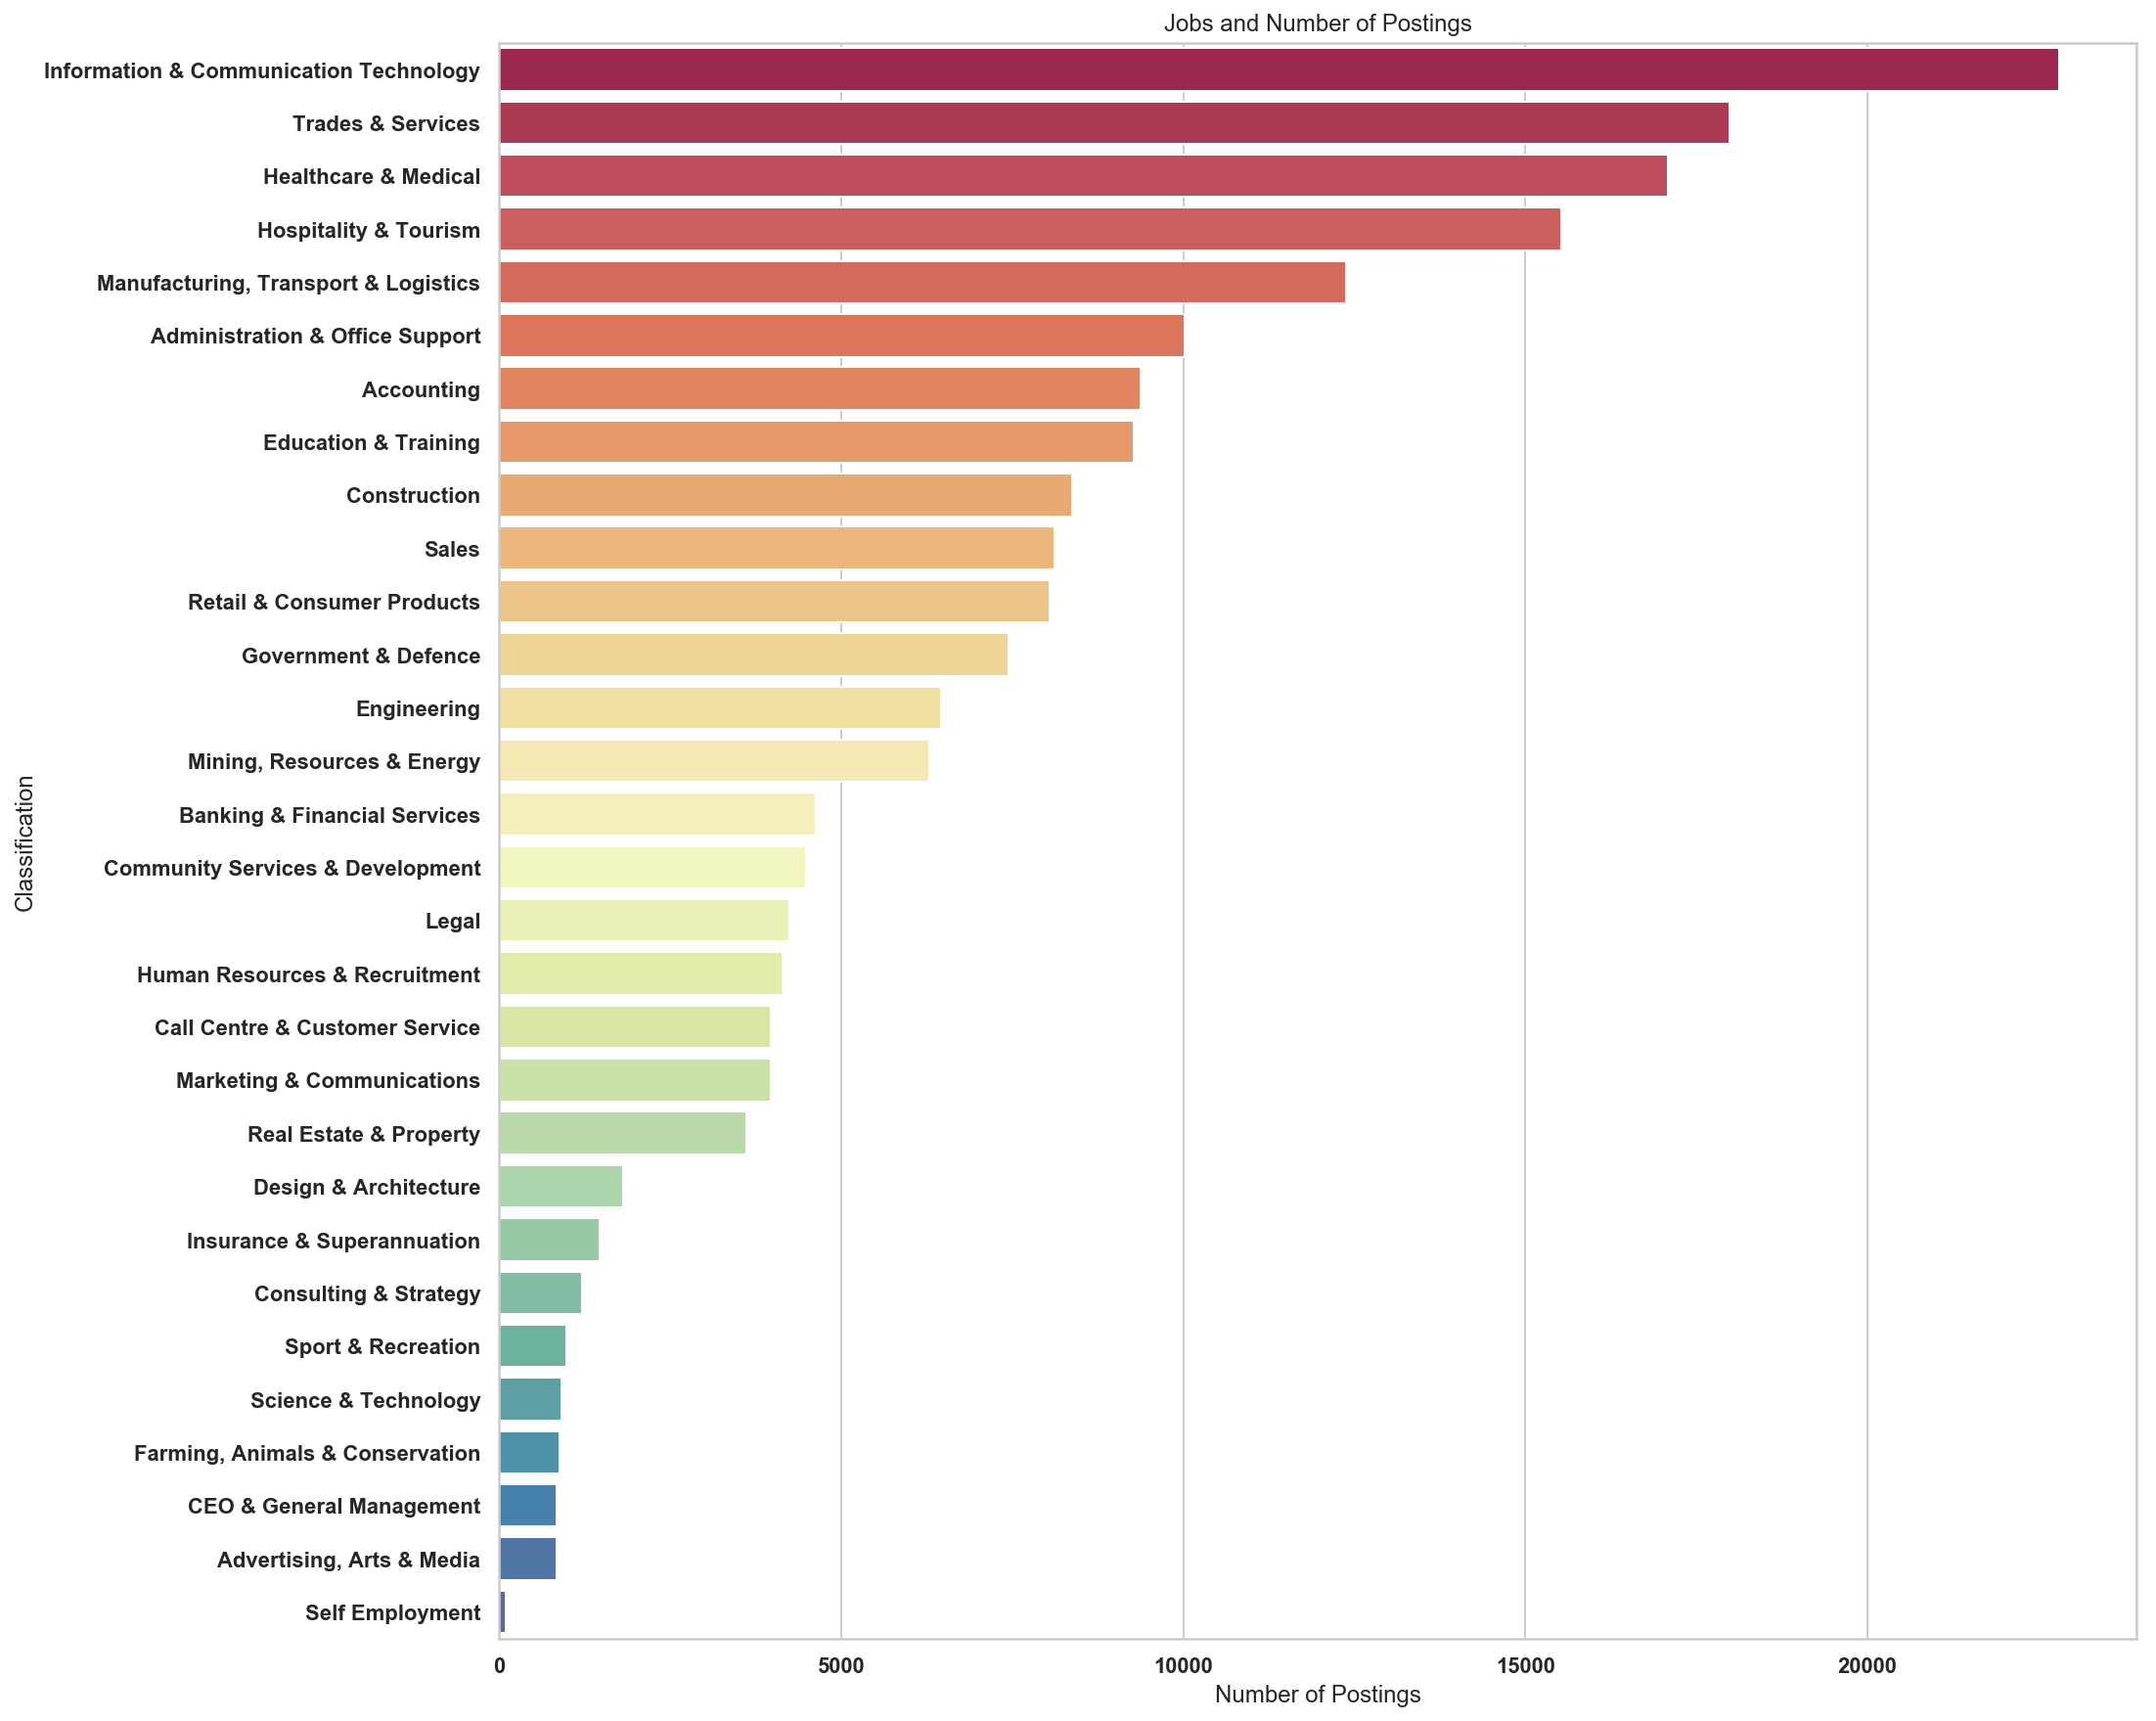

In [123]:
plt.figure(figsize=(15,15))
sns.countplot(y='Classification',data=df_classification,palette='Spectral',order=df_classification.Classification.value_counts().index)
# df_classification['Classification'].value_counts().hist()
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.show()



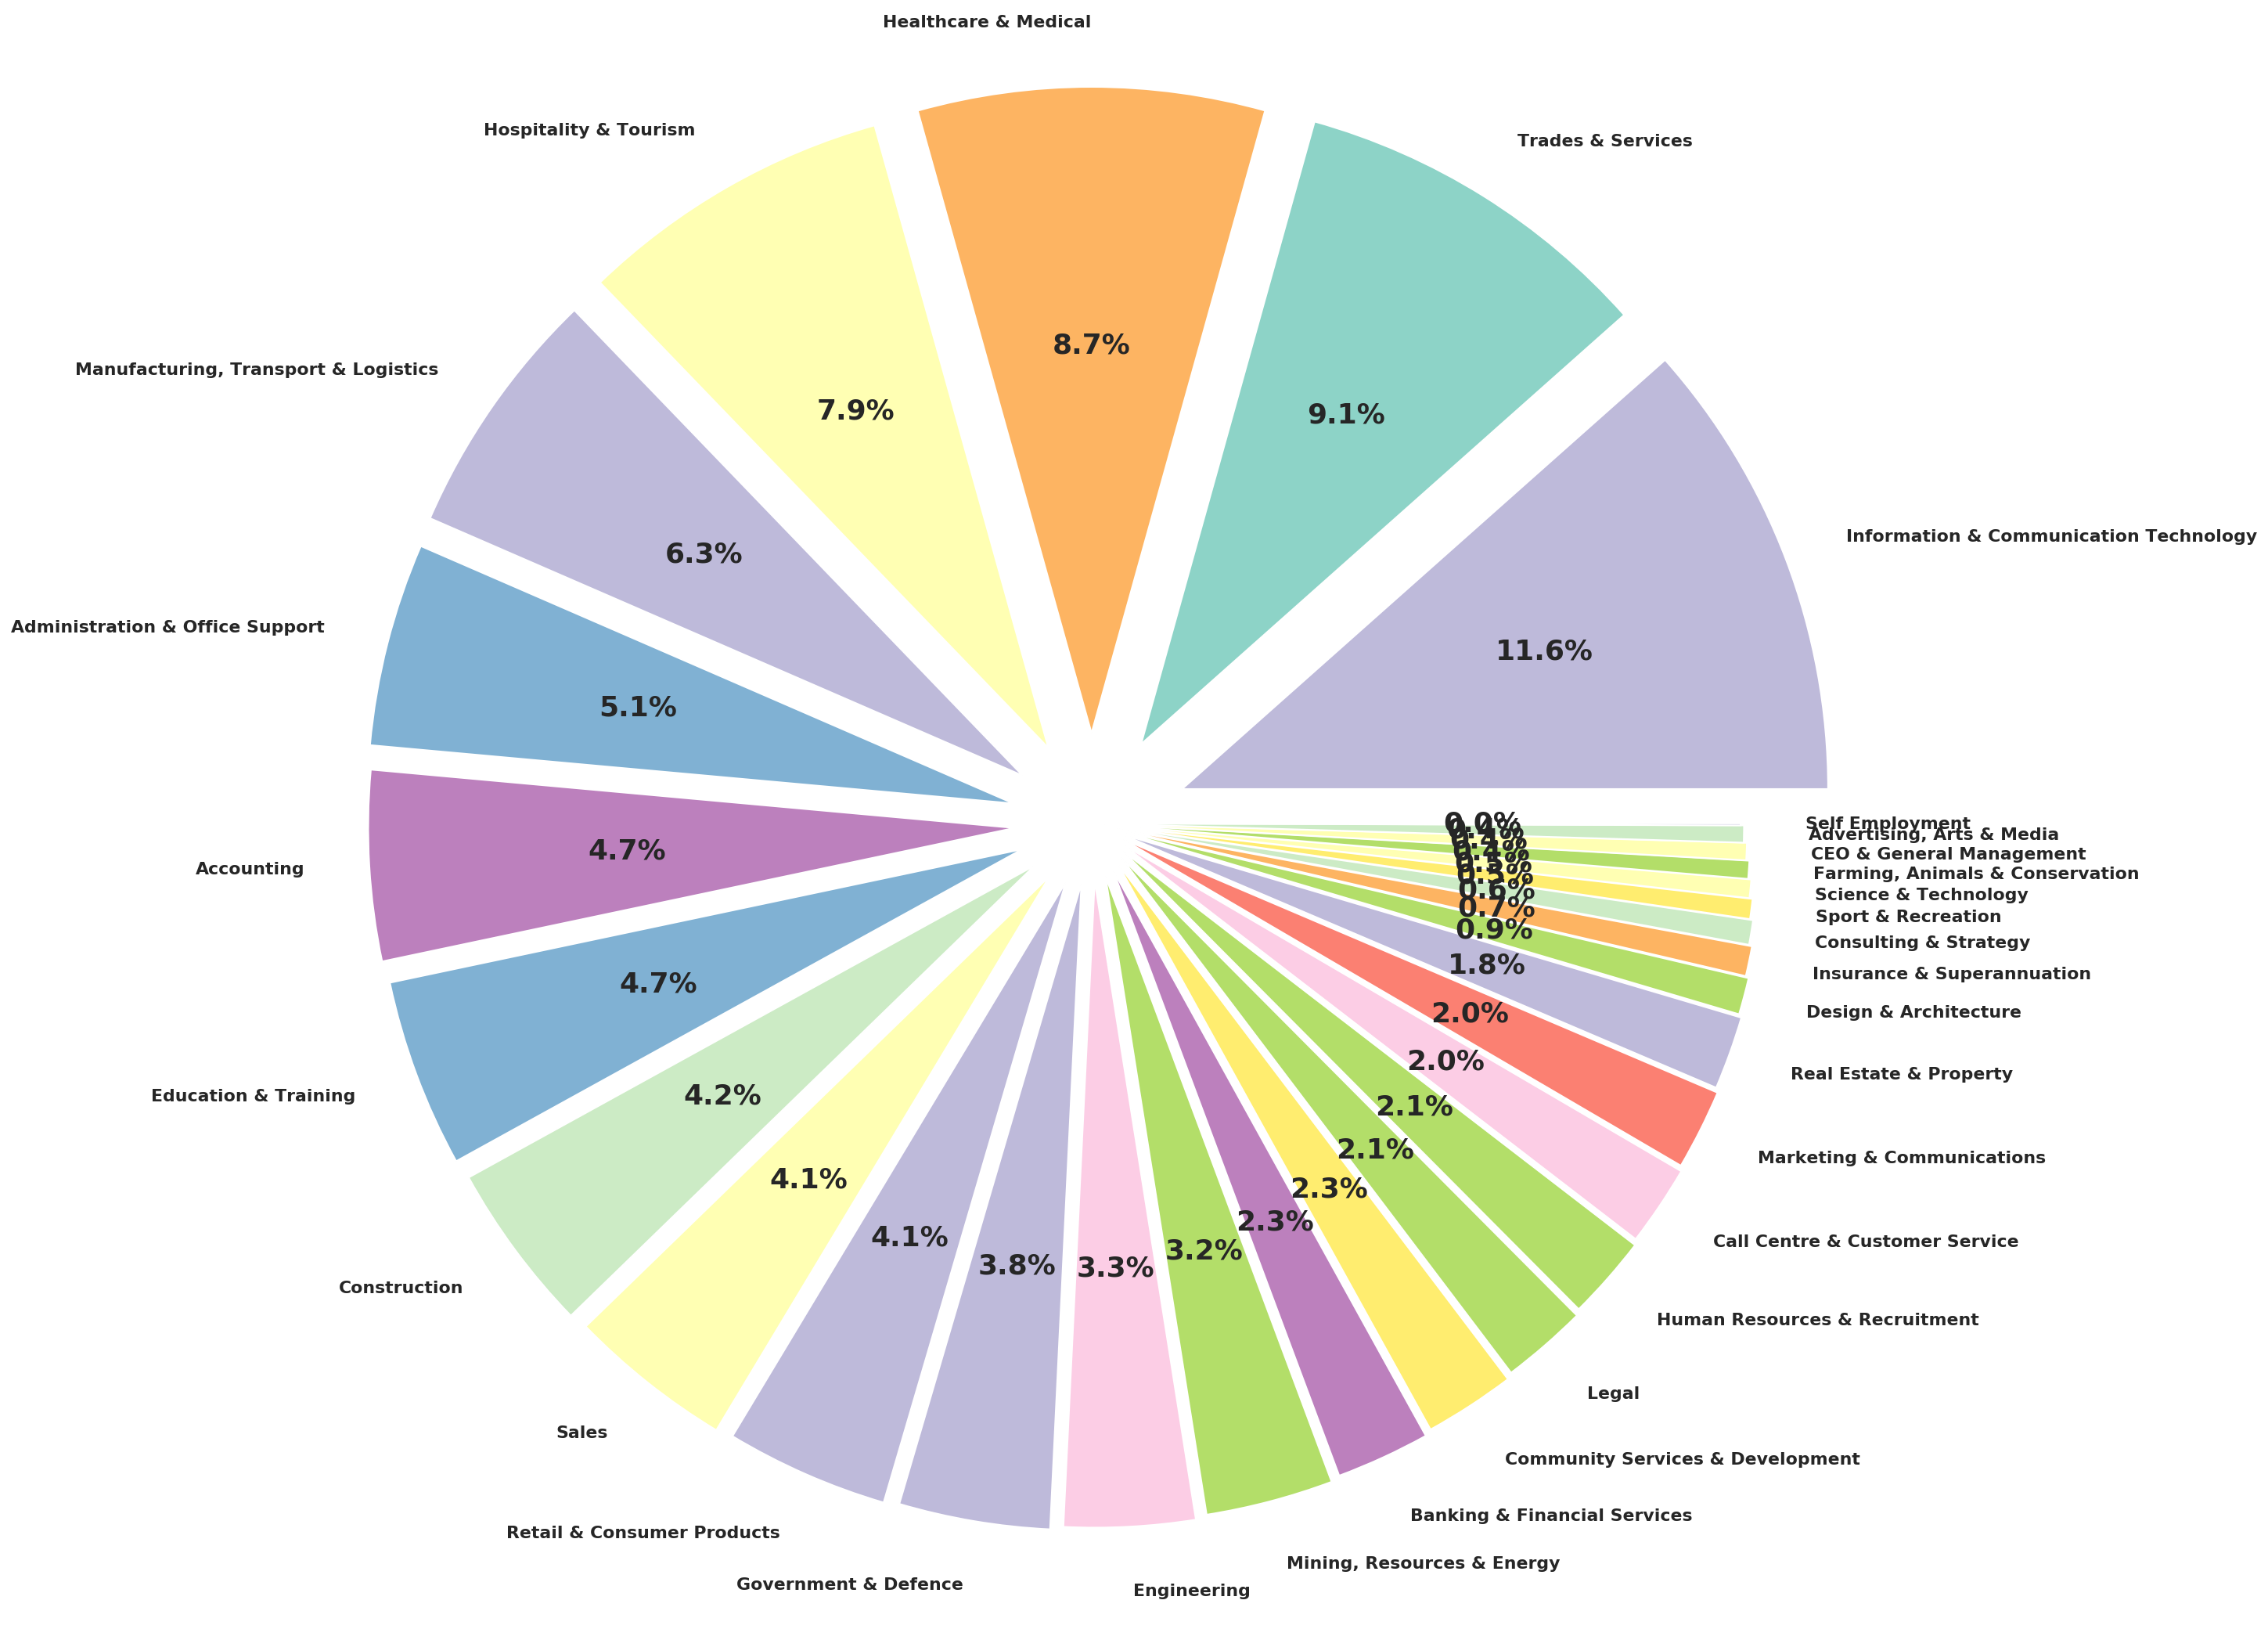

In [65]:
# Pie char for job market share of classifications
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
df_pie = df_classification['Classification'].groupby(df_classification['Classification'])

explode = [0.15-x*0.005 for x in range(len(df_pie))]
cs = cm.Set3( np.random.rand(len(df_pie)) )


df_pie.count().sort_values(ascending=False).plot.pie(title="Market share of Each Classification",explode=explode,colors=cs, figsize=(20,20),autopct='%1.1f%%')

plt.tight_layout()
plt.title('')
plt.ylabel('')
plt.show()

### Observation
* So IT has the most job postings with around 20000 job postings, which takes up 12% of the market
* Top on demand jobs are IT, Trades & Services, Healthcare & Medical, Hospitality & Tourism

* Numbers of Sub-classifications per Classification

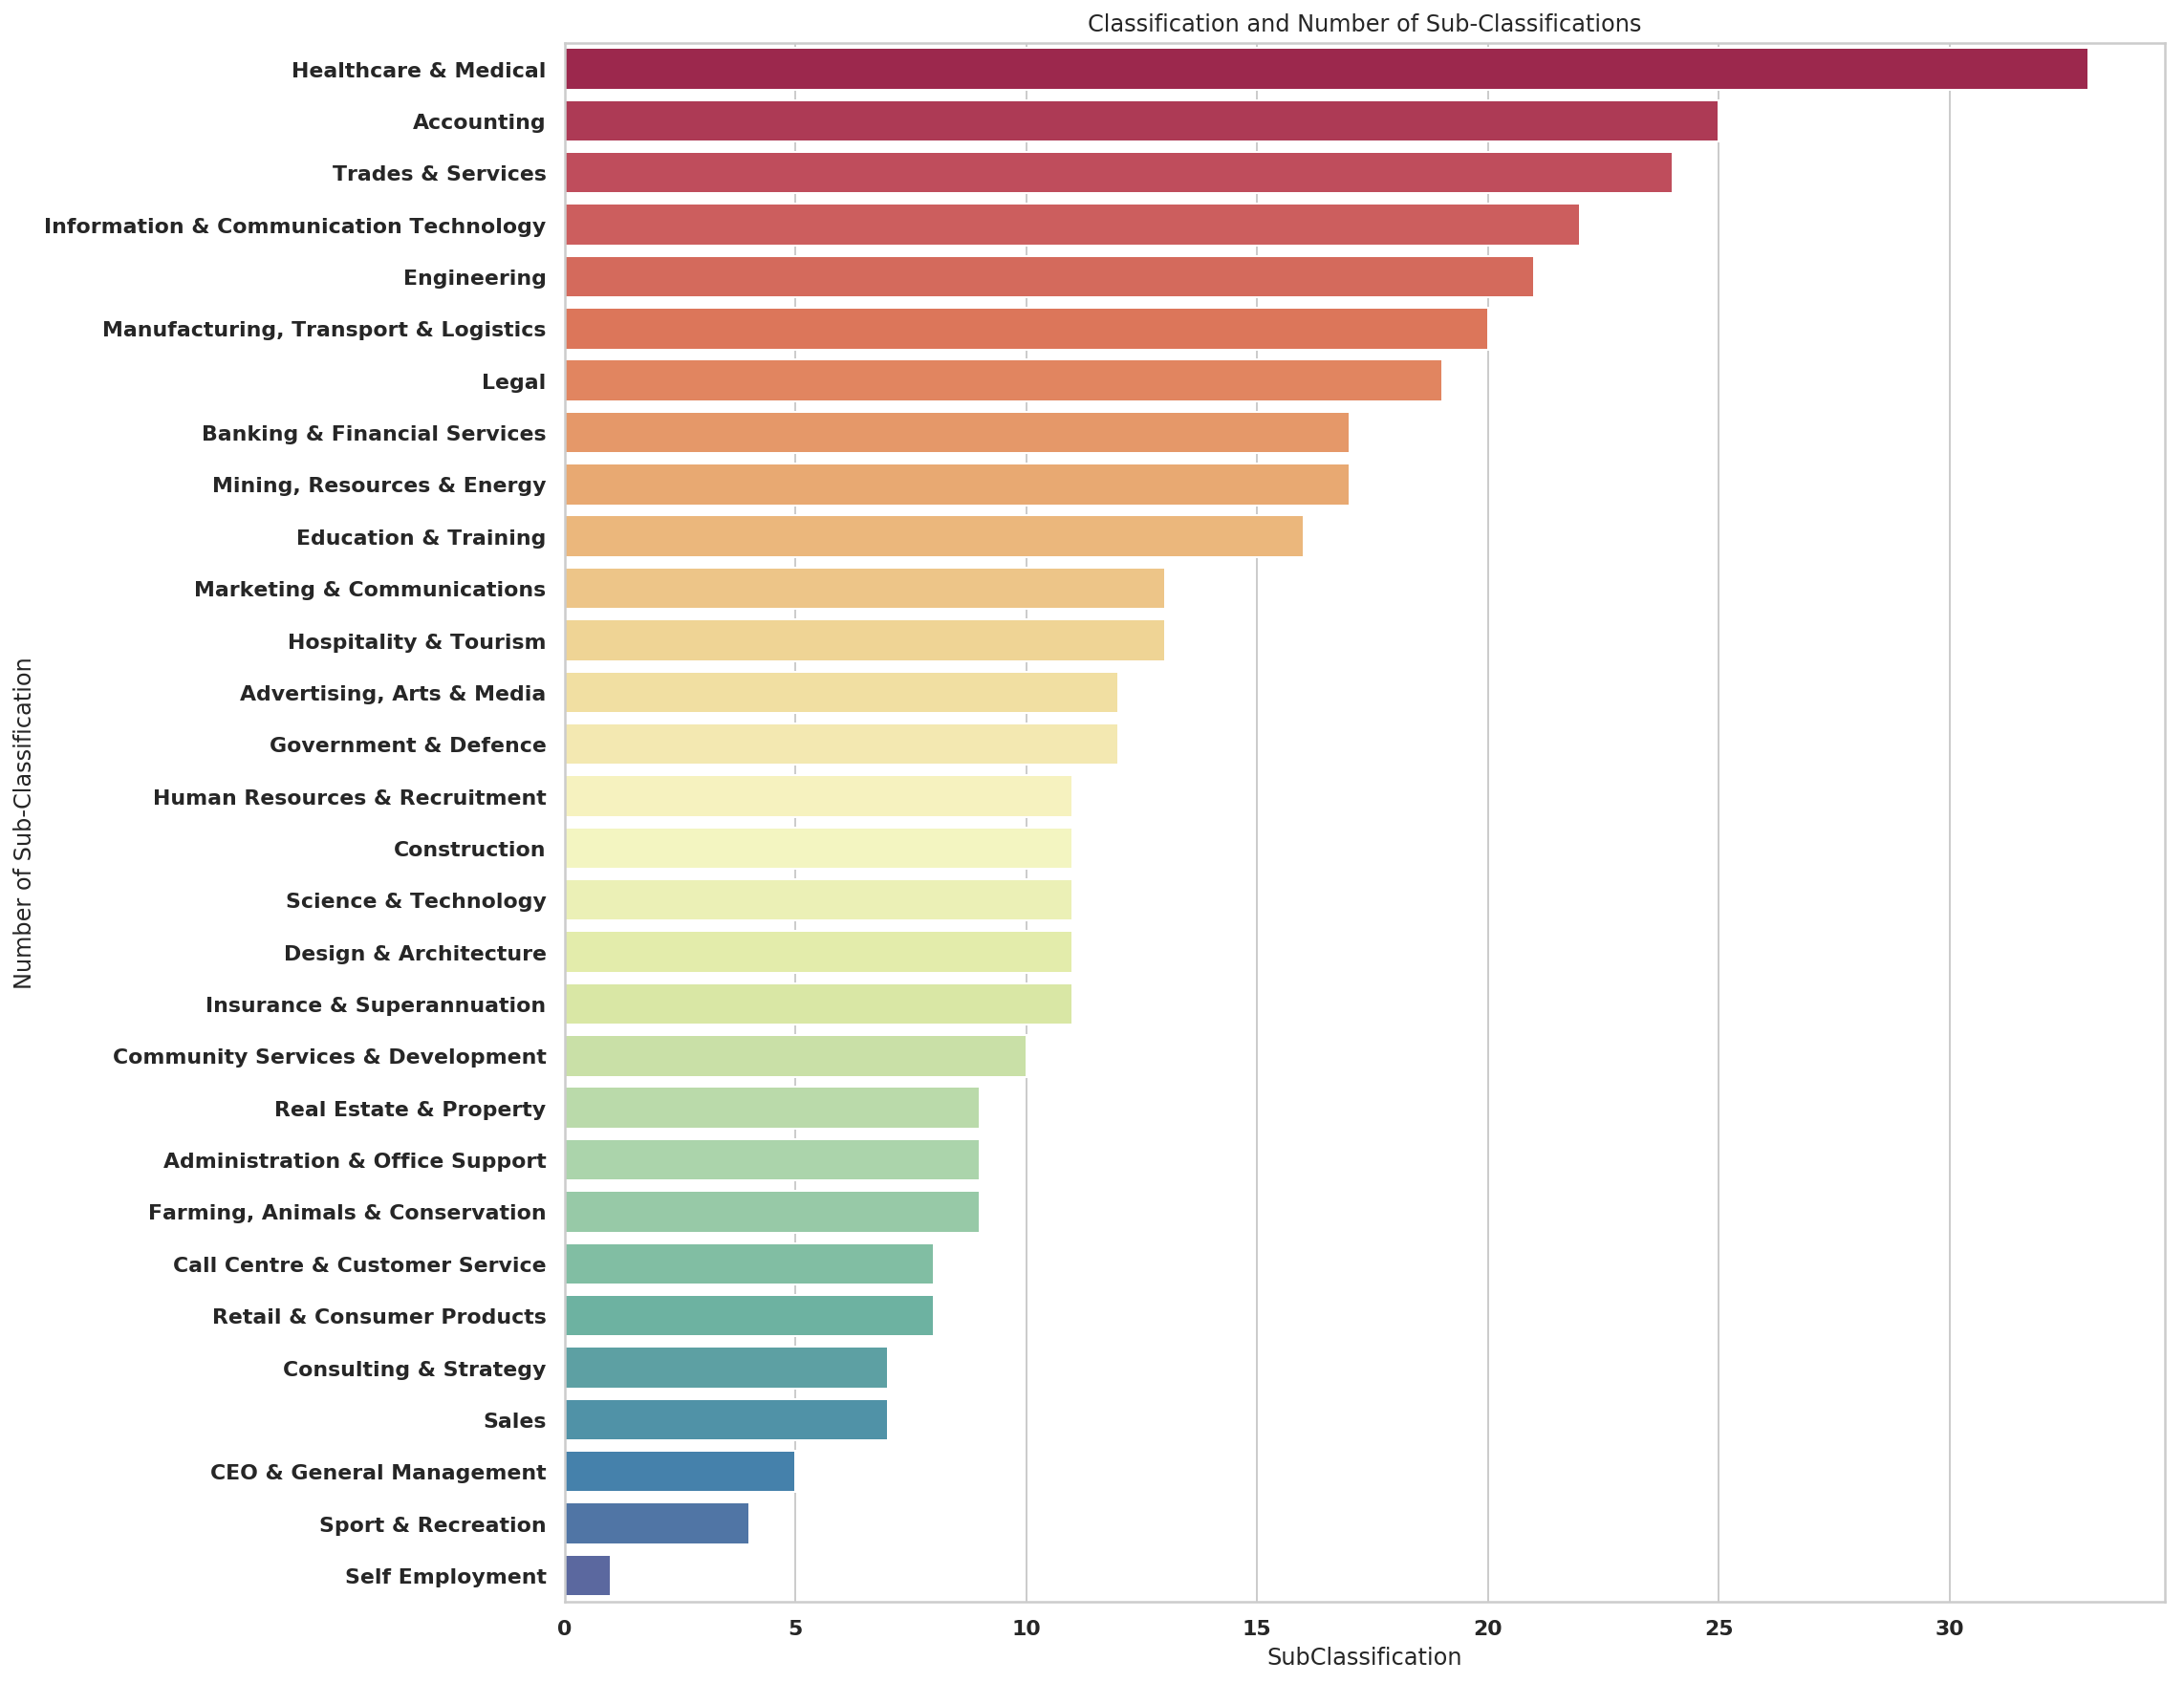

In [12]:
temp = pd.DataFrame(df_classification.groupby(['Classification'])['SubClassification'].value_counts())
temp = temp['SubClassification'].groupby(['Classification']).count()
temp = pd.DataFrame(temp.reset_index())

plt.figure(figsize=(15,15))
sns.barplot(x='SubClassification',y='Classification',data=temp.sort_values(by=['SubClassification'],ascending=False),palette='Spectral')
plt.title('Classification and Number of Sub-Classifications')
plt.ylabel('Number of Sub-Classification')
plt.show()

### Observation
* Top 5 with the most subclassifications are Healthcare, Accounting, Trades and Services, IT, and Engineering
* Bottoms are Self Employment, Sport and Recreation, CEO & Management, and Sales

* Looking at the top 4 classifications and their portions of sub classifications

In [158]:
# Get a list of Classifications sorted
list_of_class = df_classification.groupby('Classification').count().reset_index().sort_values(by=['Title'],ascending=False)['Classification'].tolist()
# Get interactive
def update(List):
    fig = plt.figure(figsize=(14,14))
    axs = fig.add_subplot(111)
    
    temp = df_classification[df_classification['Classification']==List].groupby(['SubClassification']).count().reset_index().sort_values(by='Title',ascending=False)
    explode = [0.1-x*0.005 for x in range(len(temp))]
    cs1 = cm.Set1( np.random.rand(len(temp)) )
    p,texts, autotexts = axs.pie(temp['Title'],colors=cs1,explode=explode,labels=temp['SubClassification'],wedgeprops={'alpha':0.7},autopct='%1.1f')
    axs.title.set_text(List)
    
    for t in texts:
        t.set_color('grey')
    for t in autotexts:
        t.set_color('grey')
interact(update,List=list_of_class)

interactive(children=(Dropdown(description='List', options=('Information & Communication Technology', 'Trades …

<function __main__.update(List)>

### Top subclassification in each classification
* IT: Developers, Business/Systems Analysts, Project Management
* Trades & Services: Car trading, Electricians, Labourers
* Healthcare & Medical: Nursing - Aged Care, Physiotherapy, GP
* Hopitality: Chefs/Cooks, Waiting Staff, Bar & Beverage Staff


### 1.2 Location of the job



In [75]:
# Removing all the missing rows for locations
df_location = df[df['Location'].isna()==False]
df_location.shape

(197229, 12)

* Number of Job per locations

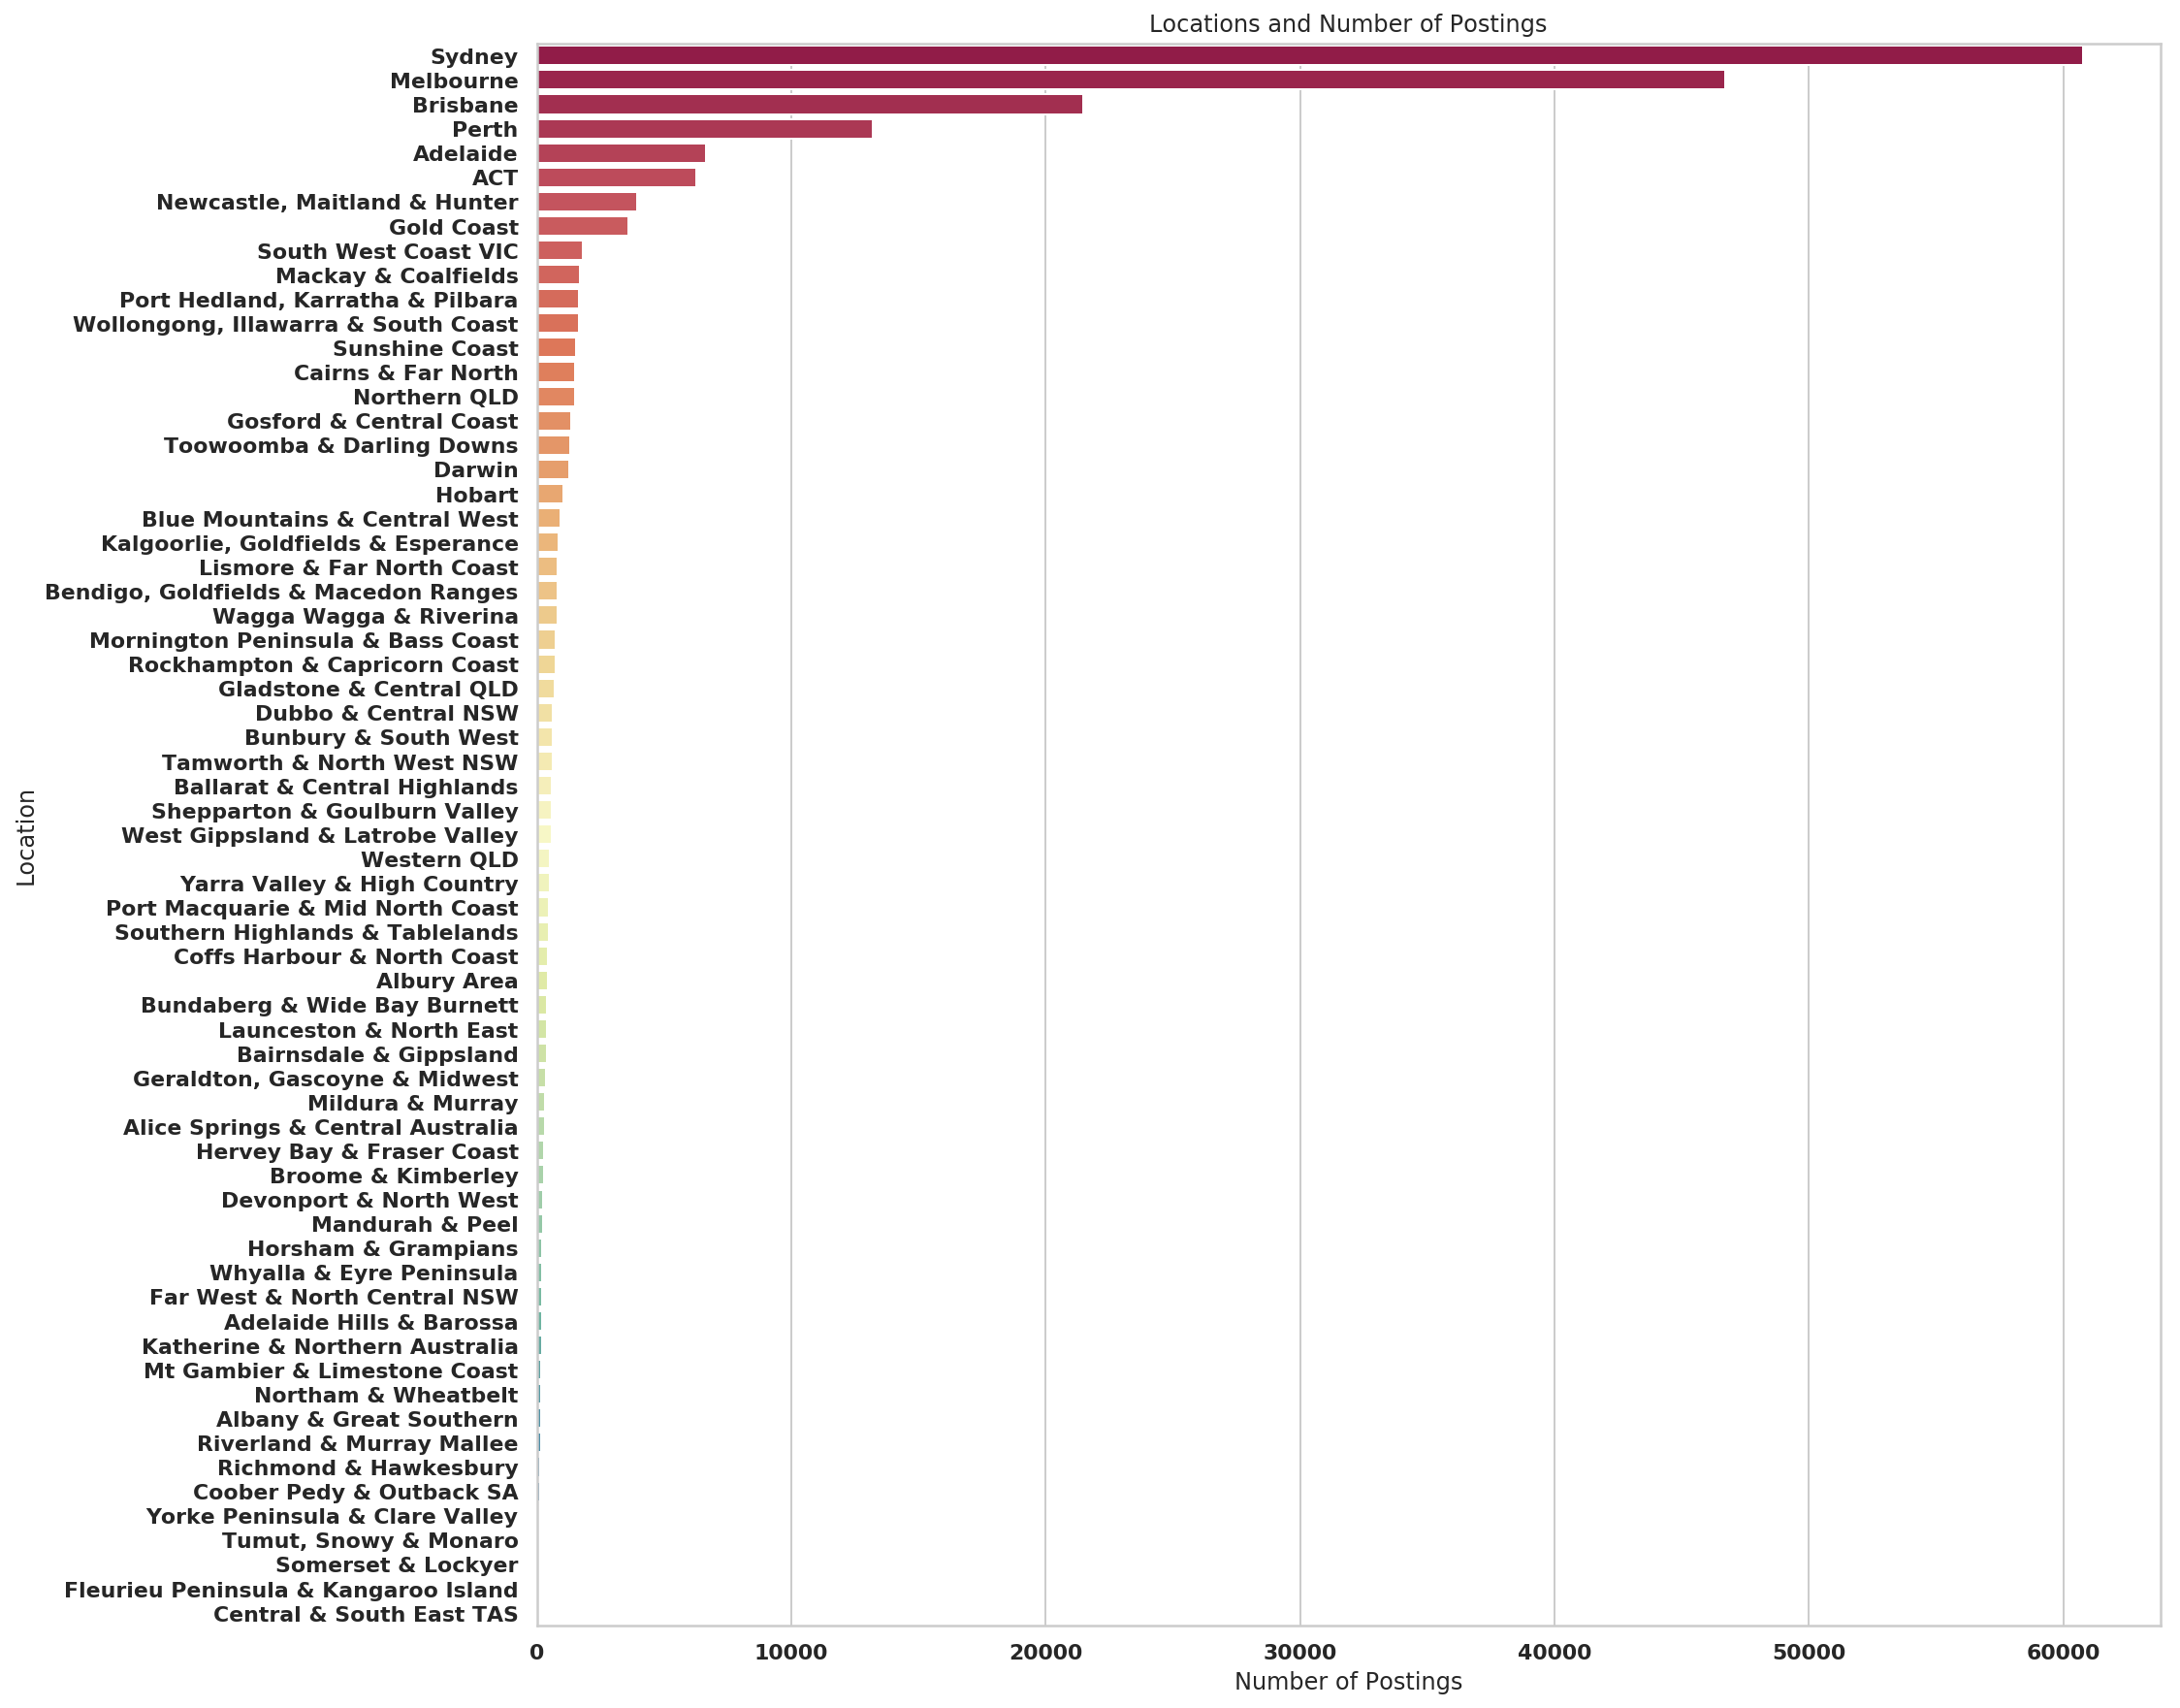

In [87]:
plt.figure(figsize=(15,15))
sns.countplot(y='Location',data=df_location,palette='Spectral',order=df_location.Location.value_counts().index)
plt.title('Locations and Number of Postings')
plt.xlabel('Number of Postings')
plt.show()



### Observation
* Sydney has the most job postings more than 60000
* The next cities are (in order) Melbourne, Brisbane, Perth, Adelaide, ACT

* Now let's look at the Classifications for the top cities

In [165]:
# Get a list of Classifications sorted
list_of_class = df_classification.groupby('Location').count().reset_index().sort_values(by=['Title'],ascending=False)['Location'].tolist()
# Get interactive
def update(Location):
    fig = plt.figure(figsize=(14,14))
    axs = fig.add_subplot(111)
    
    temp = df_location[df_location['Location']==Location].groupby(['Classification']).count().reset_index().sort_values(by='Title',ascending=False)

    explode = [0.1-x*0.005 for x in range(len(temp))]
    cs1 = cm.Set1( np.random.rand(len(temp)) )
    p,texts, autotexts = axs.pie(temp['Title'],colors=cs1,explode=explode,labels=temp['Classification'],wedgeprops={'alpha':0.7},autopct='%1.1f')
    axs.title.set_text(Location.upper())
    
    for t in texts:
        t.set_color('grey')
    for t in autotexts:
        t.set_color('grey')
    plt.show()
interact(update,Location=list_of_class)

interactive(children=(Dropdown(description='Location', options=('Sydney', 'Melbourne', 'Brisbane', 'Perth', 'A…

<function __main__.update(Location)>

### Observation
* It is very interesting to see that while IT is in demand in the 3 big cities Melbourne, Sydney, and Brisbane, the top job in Gold Coast is Hopitality
* Hopitality & Tourism is in the second spot in Sydney and Melbourne, while it is in the 5th place in Brisbane
* When we look at ACT, of course the top 2 sectors are IT and Government & Defence

### 1.3 Salary Range and Classification

## 1) Study the job metadata
### Market Sectors:
As can be seen below, the data is missing 38.1% of classifications and sub-classifications, so these job postings will be ignored.  This still leaves 

In [26]:
# Group jobs by classification
# Check how many jobs are missing a classification
rows = df.shape[0]
missing_class_percentage = (rows - df[df['Classification'].isna()].shape[0])/rows
missing_sub_percentage = (rows - df[df['SubClassification'].isna()].shape[0])/rows
print("Available classifications: ",missing_class_percentage*100,'%',sep='')
print("Available sub-classifications: ",missing_sub_percentage*100,'%',sep='')

Available classifications: 61.92880490584878%
Available sub-classifications: 61.92880490584878%


In [27]:
# Get the list of the top 20 locations with highest volume of jobs
df_location = df.groupby('Location').count().reset_index()
df_location = df_location.sort_values(by=['Title'],ascending=False)[:20]['Location'].tolist()
df_location

['Sydney',
 'Melbourne',
 'Brisbane',
 'Perth',
 'Adelaide',
 'ACT',
 'Newcastle, Maitland & Hunter',
 'Gold Coast',
 'South West Coast VIC',
 'Mackay & Coalfields',
 'Port Hedland, Karratha & Pilbara',
 'Wollongong, Illawarra & South Coast',
 'Sunshine Coast',
 'Cairns & Far North',
 'Northern QLD',
 'Gosford & Central Coast',
 'Toowoomba & Darling Downs',
 'Darwin',
 'Hobart',
 'Blue Mountains & Central West']

In [28]:
df_top_20 = df[df['Location'].isin(df_location)]
df_top_20

Title  \
0                                Casual Stock Replenisher   
2       RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3                                   Team member - Belrose   
4       Business Banking Contact Centre Specialist, Ni...   
5       Business Banking Contact Centre Specialist, Ni...   
6                    Casual Café All-rounder in Semaphore   
7                Casual Café All-rounder in Woolloongabba   
8                                            Telemarketer   
9                            Casual Dish Hand in Brighton   
10                   Sales and Service Banking Consultant   
11                       Customer Service Client Nurturer   
12                       Functions Supervisor - Perth Zoo   
13                        BPV_Utility All Rounders_Casual   
14                                  Casual Cleaner in Kew   
15                               Customer Service Officer   
16                   Sales and Service Banking Consultant   
17                        Maintenance Assistant Part-Time   
18      Telstra Retail Sales & Service Consultant - Ca...   
19                                              Assembler   
20                                    Procurement Officer   
21                             Casual Barista in Murarrie   
22                   Sales and Service Banking Consultant   
23                             Casual Barista in Richmond   
24                   Sales and Service Banking Consultant   
25                              Casual Cook in Palm Beach   
26      Clinical Document Processing and Quality Assur...   
27            Investment Accountant - NAB Asset Servicing   
28                               Casual Cook in Melbourne   
29                 Office Administrator - 4 days per week   
30                   Sales and Service Banking Consultant   
...                                                   ...   
197195                             Senior Project Manager   
197196        Chief Financial Officer & Company Secretary   
197197  Permanent Full-Time Role - VR General Practiti...   
197198  Permanent Full-Time Role - VR General Practiti...   
197199                                 Speech Pathologist   
197200  Senior Data Engineer - GCP (Google Cloud)  - C...   
197201  Project Manager | Well Established Mid-Tier He...   
197202                          High Rise Project Manager   
197203                      Chief Financial Officer (CFO)   
197204             AWS IoT Data Engineer - Energy Sharing   
197205  Design Manager | Mid Tier Builder | Strong, Es...   
197206                                 Medical Oncologist   
197207                  Staff Specialist - Rehabilitation   
197208    Multiple TSPV Opportunities – CANBERRA LOCATION   
197209              Senior Project Director | Client Side   
197211                              Retail Design Manager   
197213  Construction & Major Projects - Commercial Man...   
197214                                    Medical Officer   
197215                  Child and Adolescent Psychiatrist   
197216                       Head of Merchandise Planning   
197217              IT Project/ Program Manager - Banking   
197218          IT Test Analyst OR Senior IT Test Analyst   
197219                                    Medical Officer   
197220                                    Medical Officer   
197222  Contracts Manager - Commercial Lead Required, ...   
197223  Design Manager | Mid Tier Construction | Newca...   
197224           Environmental Officer- Contaminated Land   
197225  Construction Manager Required - Commercial & A...   
197226                                        ENT Surgeon   
197228                                    VMWare Engineer   

                                               Company  \
0                                          Aldi Stores   
2                                  LB Creative Pty Ltd   
3                               Anaconda Group Pty Ltd   
4       Commonwealth Bank - Business 

### Time Series Analysis

In [97]:
# Number of job postings Australia wide
sns.set(rc={'figure.figsize':(30, 12)})
df_job_postings = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_job_postings.set_index('Date',inplace=True)

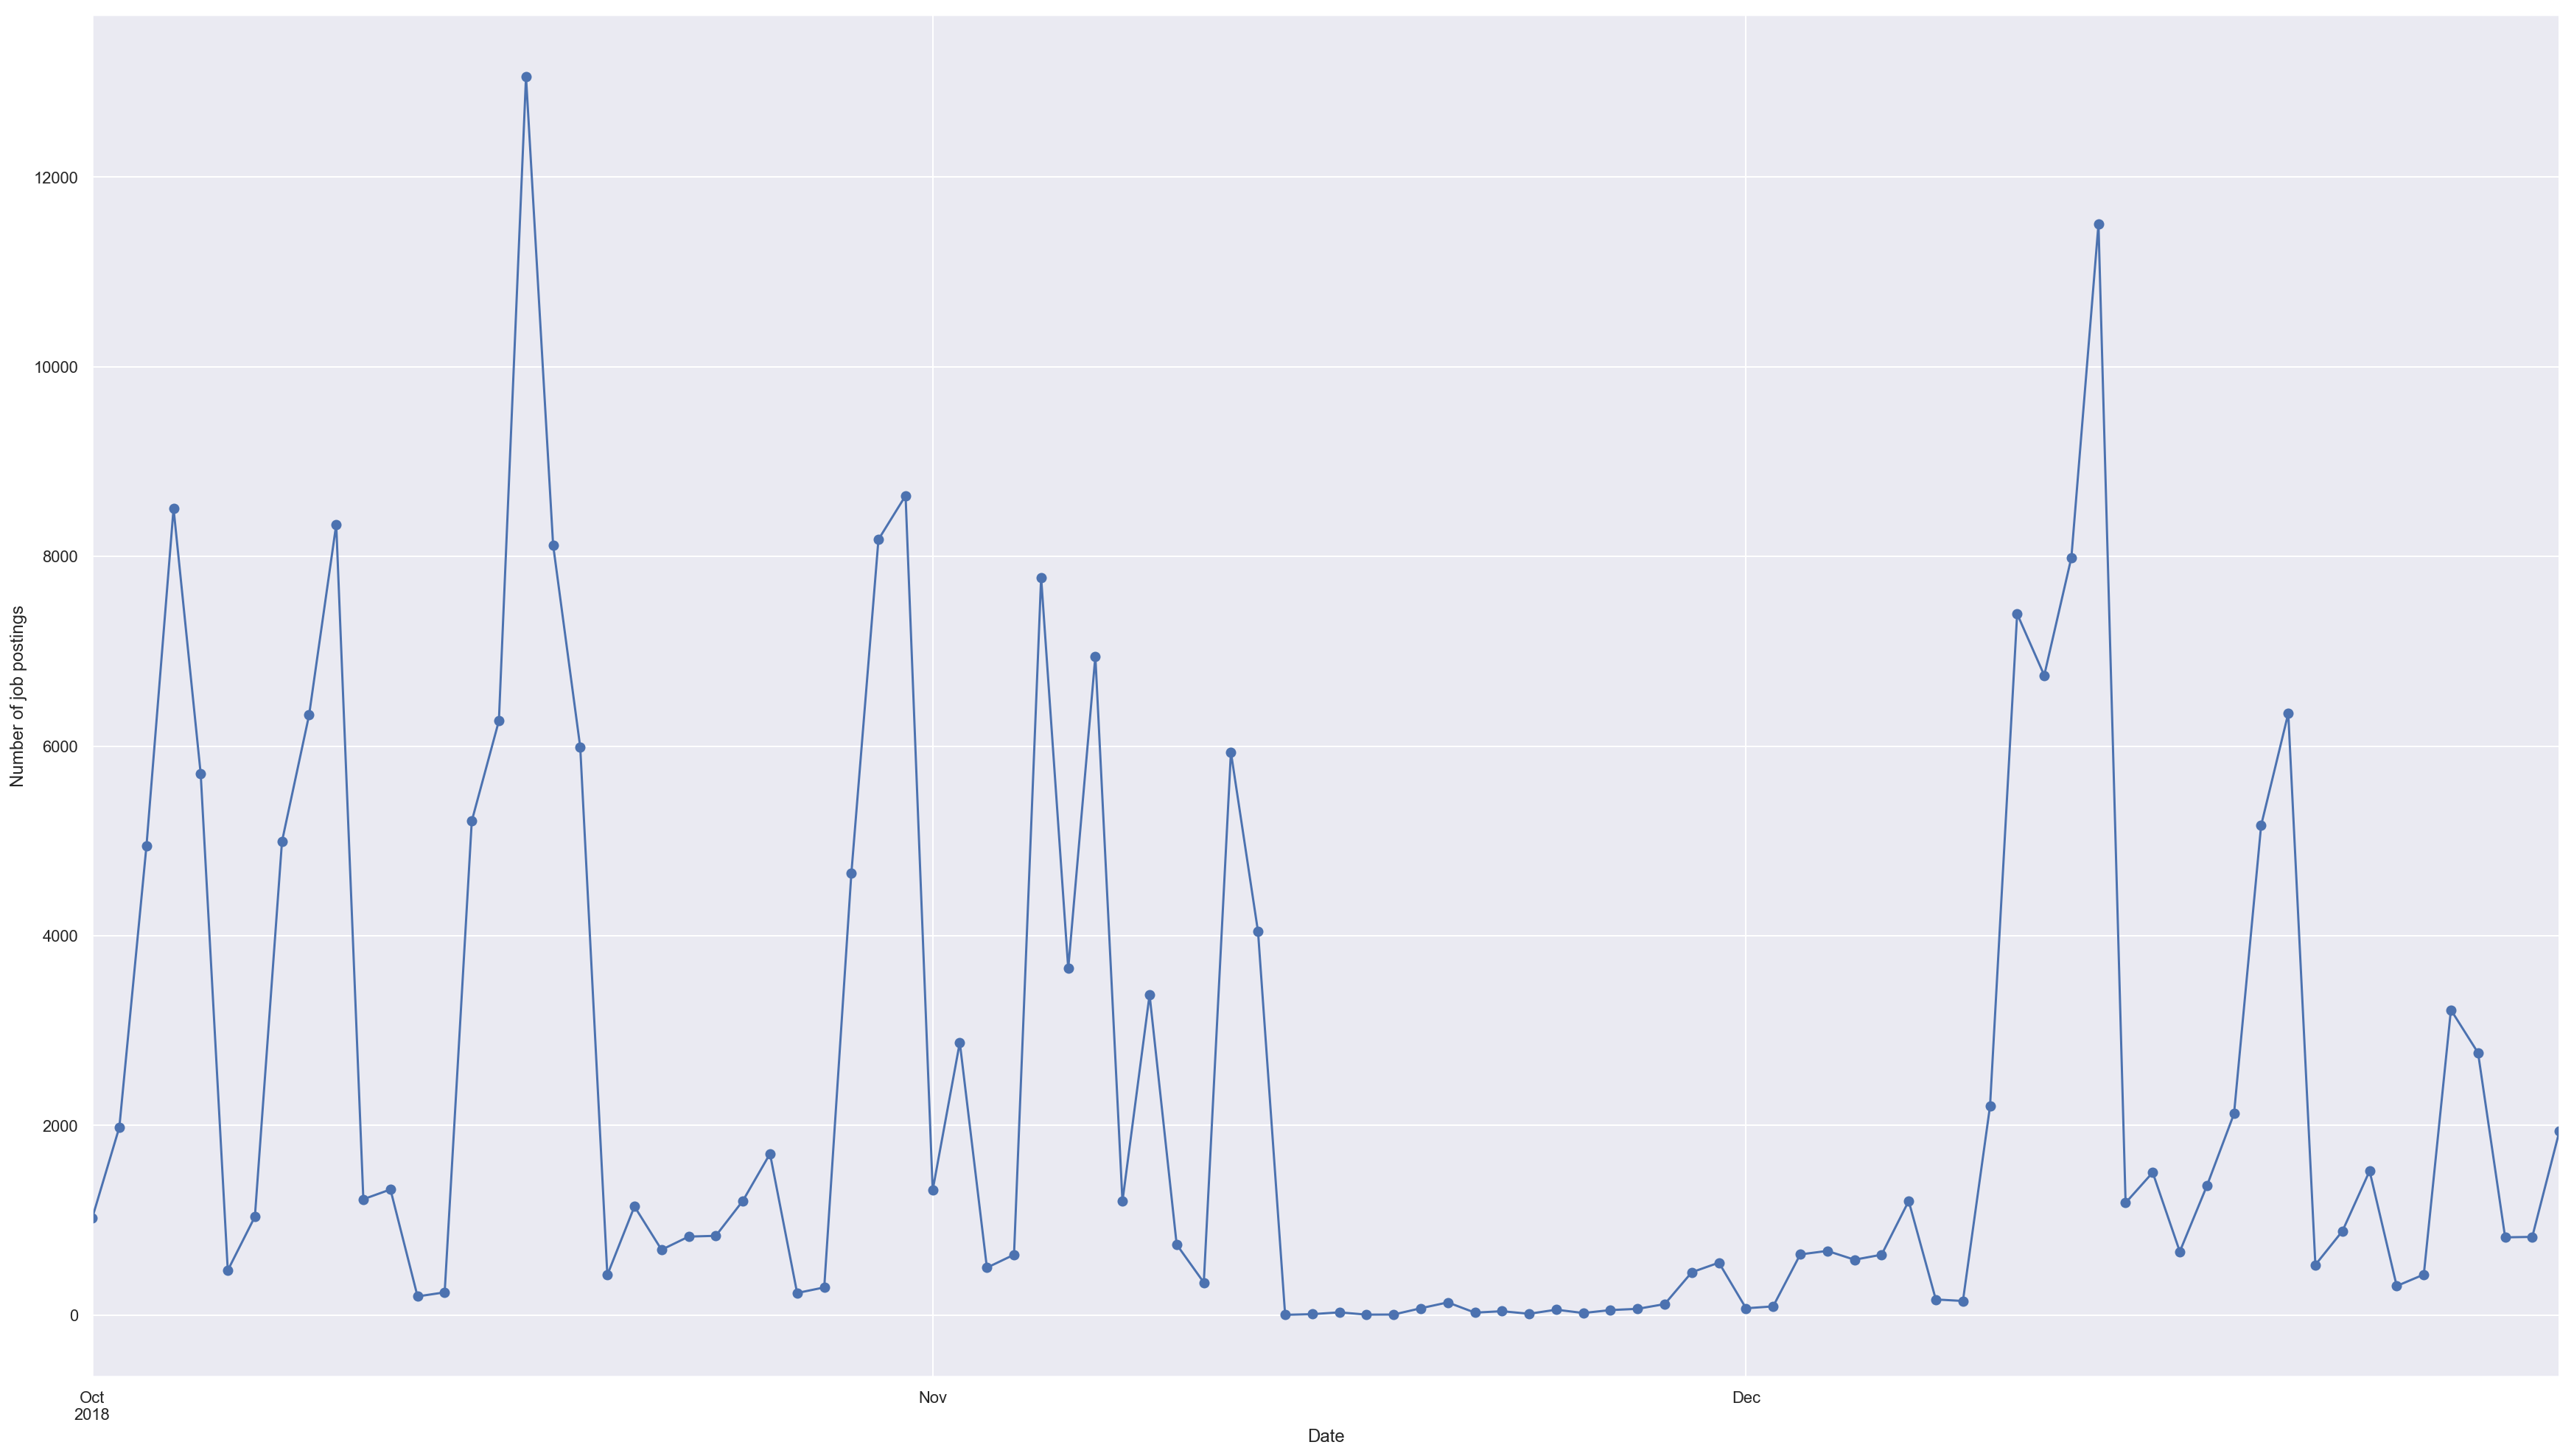

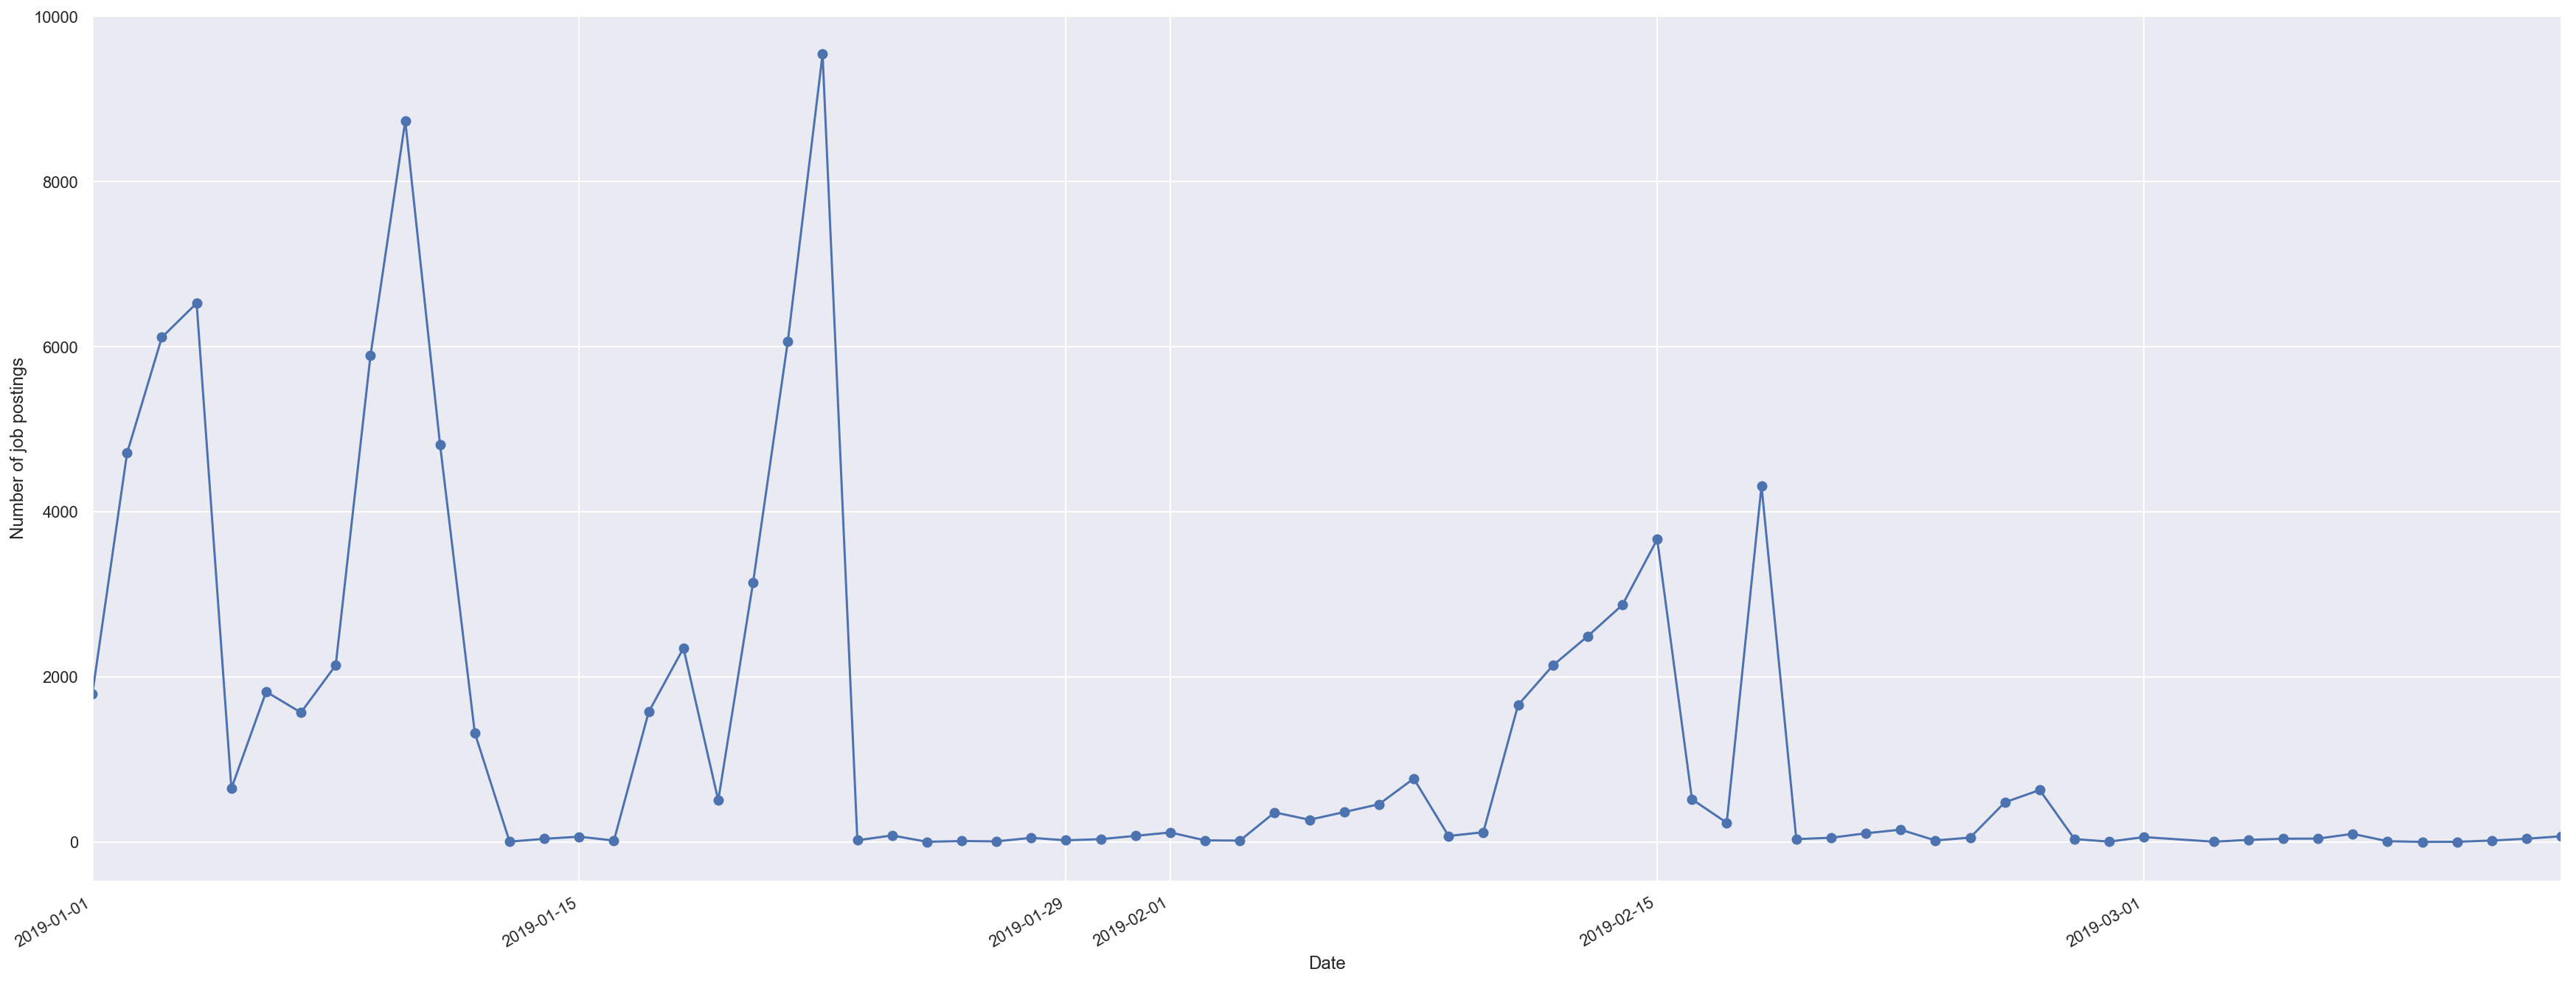

In [98]:
df_job_postings['Month'] = df_job_postings.index.month


plt.figure(figsize=(30,17))
plt.rcParams.update({'font.size': 22})


ax = df_job_postings.loc['2018', 'Title'].plot(marker='o', linestyle='-')
ax.set_ylabel('Number of job postings')
plt.show()

ax1 = df_job_postings.loc['2019', 'Title'].plot(marker='o', linestyle='-')
ax1.set_ylabel('Number of job postings')
plt.show()


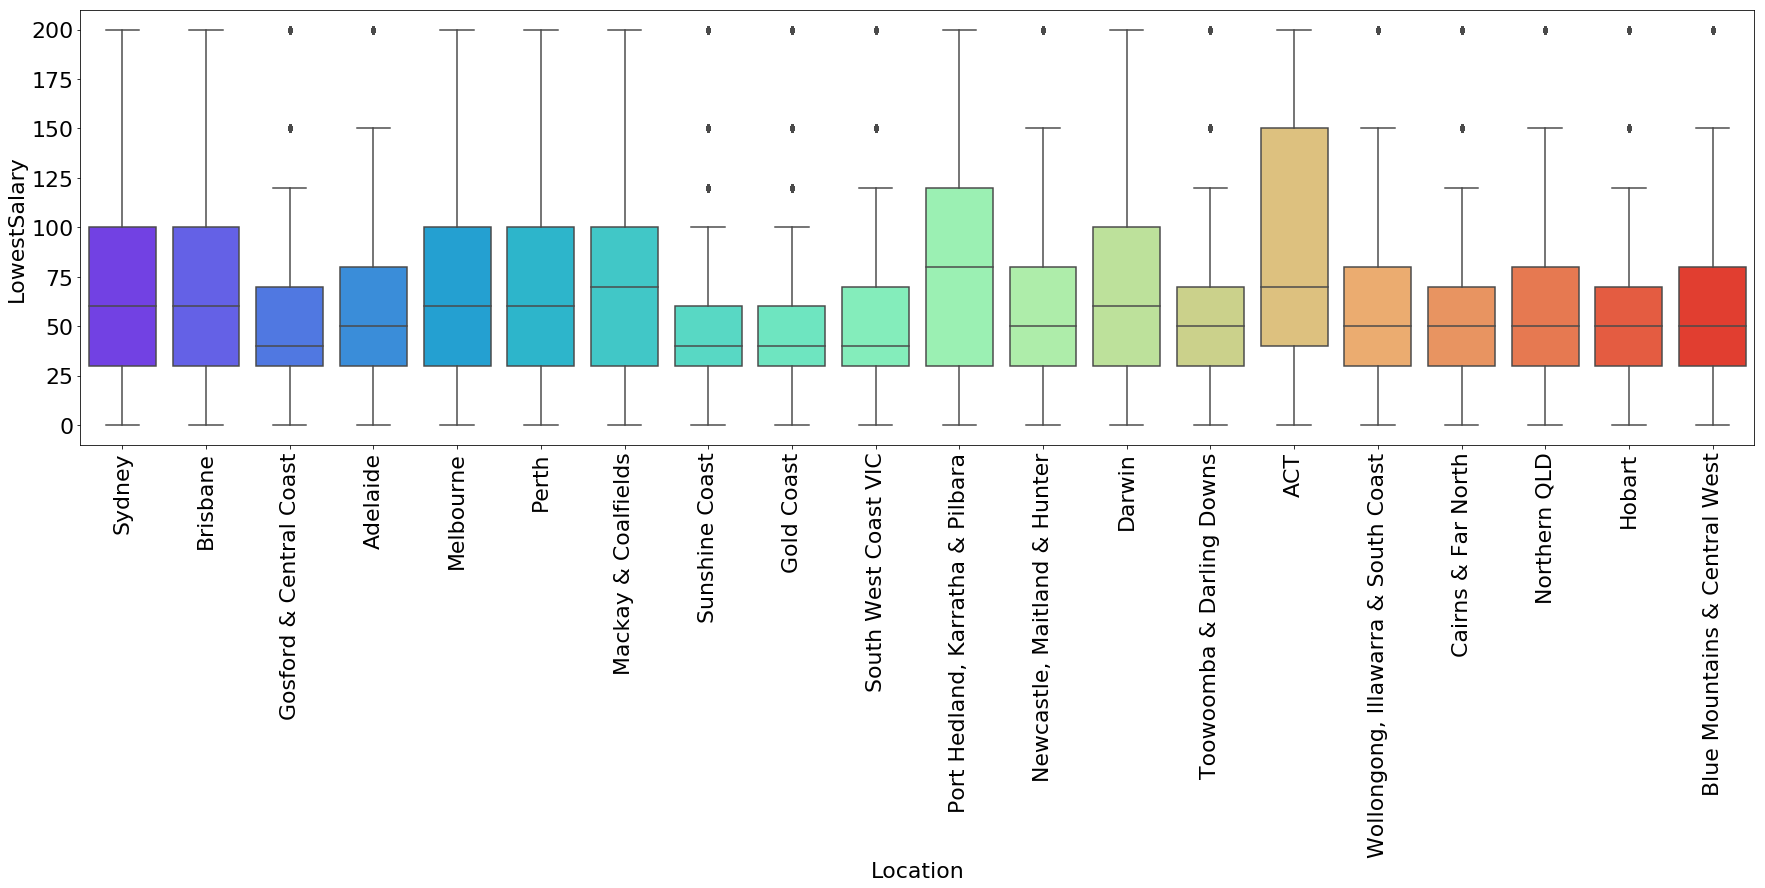

In [38]:
# Plot the distribution of lowest salaries by location
plt.figure(figsize=(30,8))
plt.rcParams.update({'font.size': 22})

box_plt = sns.boxplot(x='Location',y='LowestSalary',data=df_top_20,palette='rainbow')
box_plt.set_xticklabels(box_plt.get_xticklabels(),rotation=90)
plt.show()

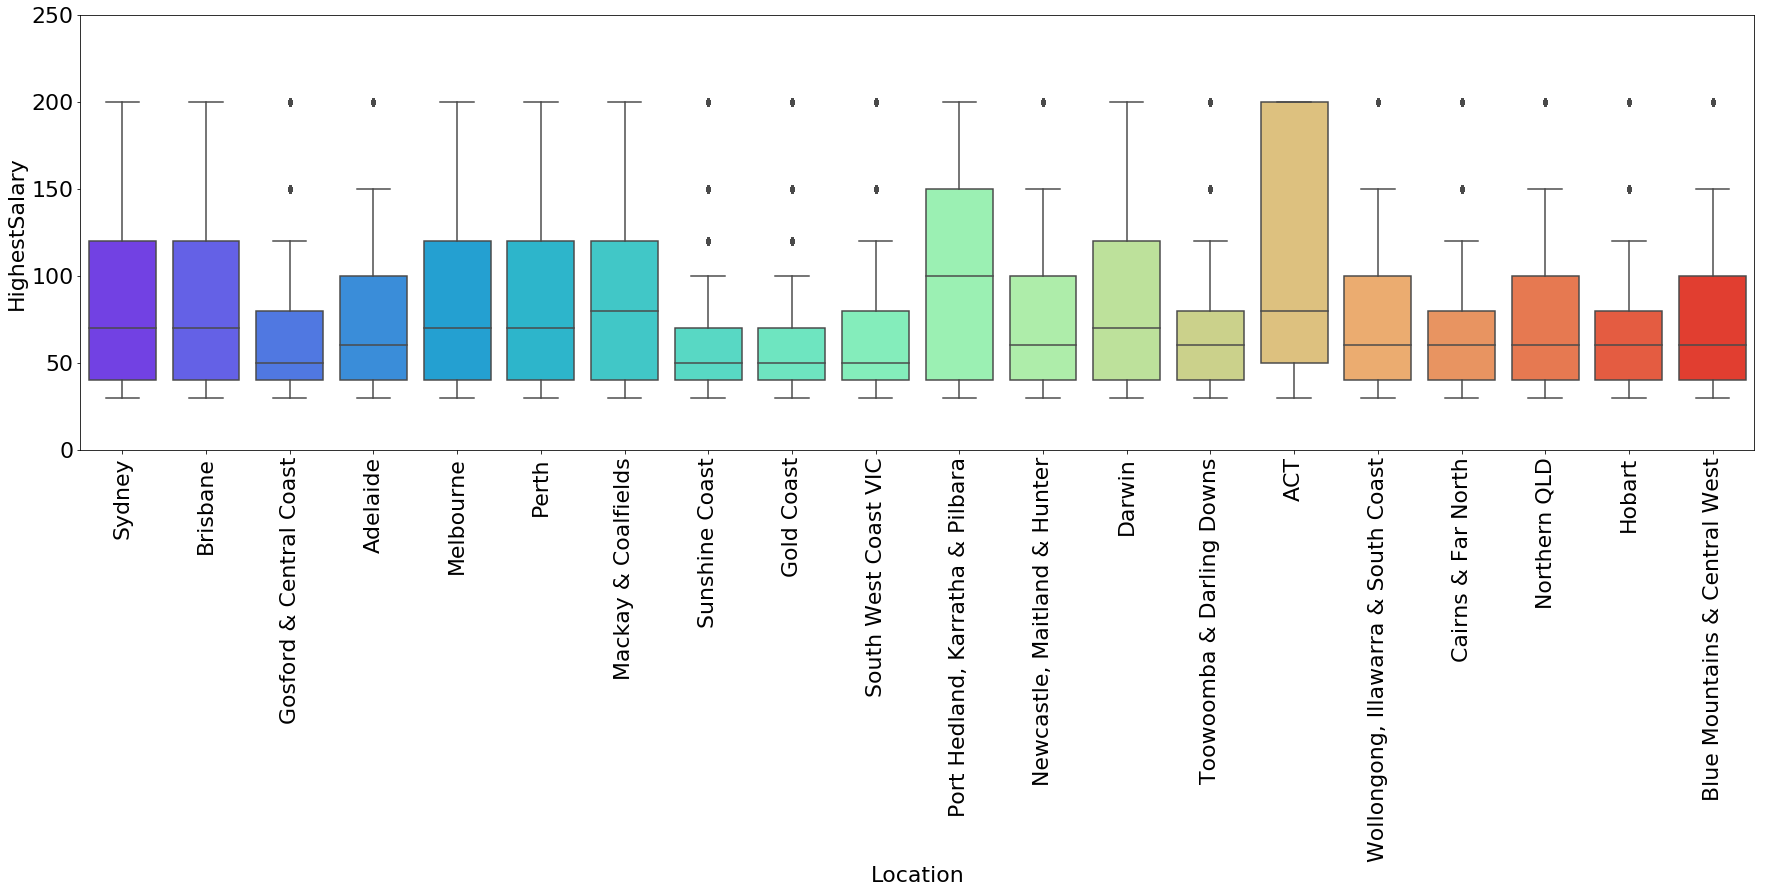

In [44]:
# Look at the distribution of highest salaries by location
plt.figure(figsize=(30,8))

box_plt = sns.boxplot(x='Location',y='HighestSalary',data=df_top_20,palette='rainbow')
box_plt.set_xticklabels(box_plt.get_xticklabels(),rotation=90)
plt.ylim([0,250])
plt.show()

In [13]:
# Find average lowest and highest salary per location
location_df = df.groupby(by='Location').mean().reset_index()
location_df.rename({"LowestSalary": "AverageLowest", "HighestSalary": "AverageHighest"},axis=1,inplace=True)

# Find the distribution of job postings by location
job_df = df["Location"].value_counts().reset_index()
job_df.rename({"index": "Location", "Location": "JobPostings"},axis=1,inplace=True)
location_df = pd.merge(location_df, job_df, on='Location')

location_df.head()

Location  AverageLowest  AverageHighest  JobPostings
0                       ACT      86.174400      198.718240         6250
1                  Adelaide      57.991883       97.021494         6653
2  Adelaide Hills & Barossa      41.191710       68.948187          193
3   Albany & Great Southern      56.600000      101.233333          150
4               Albury Area      51.201923       75.543269          416

In [14]:
# Summary of job postings distribution
location_df["JobPostings"].describe()

count       65.000000
mean      3034.292308
std       9727.263546
min         57.000000
25%        250.000000
50%        576.000000
75%       1310.000000
max      60765.000000
Name: JobPostings, dtype: float64

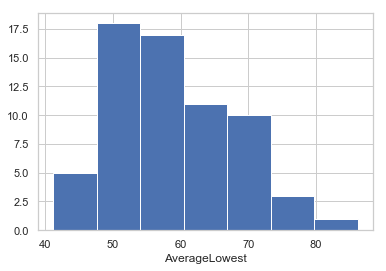

In [15]:
# Distribution of average lowest salaries Australia-wide
sns.distplot(location_df['AverageLowest'],kde=False,hist_kws=dict(alpha=1))

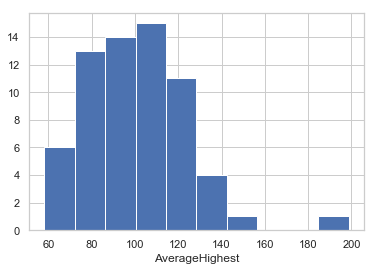

In [16]:
# Distribution of average highest salary Australia-wide
sns.distplot(location_df['AverageHighest'],kde=False,hist_kws=dict(alpha=1))

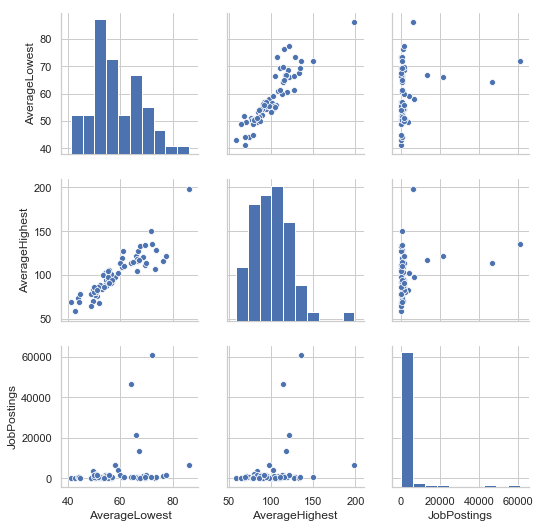

In [17]:
# Pairplot - Probably meaningless for job postings
# Can see the correlation between average lowest and average highest salary
sns.pairplot(location_df)

# In Progress (Messy)
### Can you detect which skills are needed?
Textual analysis of job requirements.  (Should be moved to its correct location at some stage).

In [10]:
import sklearn.feature_extraction.text as text_analysis
import nltk
import wordcloud

In [11]:
# Stopwords
stop_words = nltk.corpus.stopwords.words('english')

# Analyzer for use in CountVectorizer
stemming_analyzer = text_analysis.CountVectorizer().build_analyzer()
stemmer = nltk.stem.PorterStemmer()

# Stemmer function
def stem(words):
    return [stemmer.stem(word) for word in stemming_analyzer(words)]

In [12]:
# Check to see how many data points have requirement information
null_cnt = df[df['Requirement'].isna()].shape[0]
print(null_cnt)

7


In [78]:
# Prepare data for textual analysis
requirements_all = [data['Requirement'].strip() for index, data in df[df['Requirement'].isna()==False].iterrows()]
requirements_all[:5]

['Our Casual Stock Replenishers pride themselves on filling&#8232; shelves faster than anyone else in the industry.',
 'Our Casual Stock Replenishers pride themselves on filling &#8232;shelves faster than anyone else in the industry.',
 'BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA',
 'Bring it on - do you love the great outdoors and want to work with like minded people?  We are on the lookout for new team members to join our busines',
 'We are seeking highly articulate, enthusiastic and professional individuals who are looking to work night shift.....']

In [145]:
# Perform tf-idf on entire market
# Takes a while because of the custom stem analyzer
req_analysis = text_analysis.CountVectorizer(stop_words=stop_words,analyzer='word',max_features=200)
req_tf = req_analysis.fit_transform(requirements_all)

# Calculate tf-idf values
req_analysis_transformer = text_analysis.TfidfTransformer(use_idf=True)
req_tfidf = req_analysis_transformer.fit_transform(req_tf)

In [148]:
# Calculate the total for each word after normalization
totals = req_tfidf.sum(axis=0)

# Create list of common terms with their tf-idf sum in order from highest to lowest
freq = sorted([(word, totals[0, i]) for word, i in req_analysis.vocabulary_.items()], key=lambda x: x[1],reverse=True)
freq[:5]

[('team', 18406.70447932226),
 ('join', 17959.32319445331),
 ('opportunity', 14657.710076878182),
 ('seeking', 13904.949928360455),
 ('experienced', 13015.323093796223)]

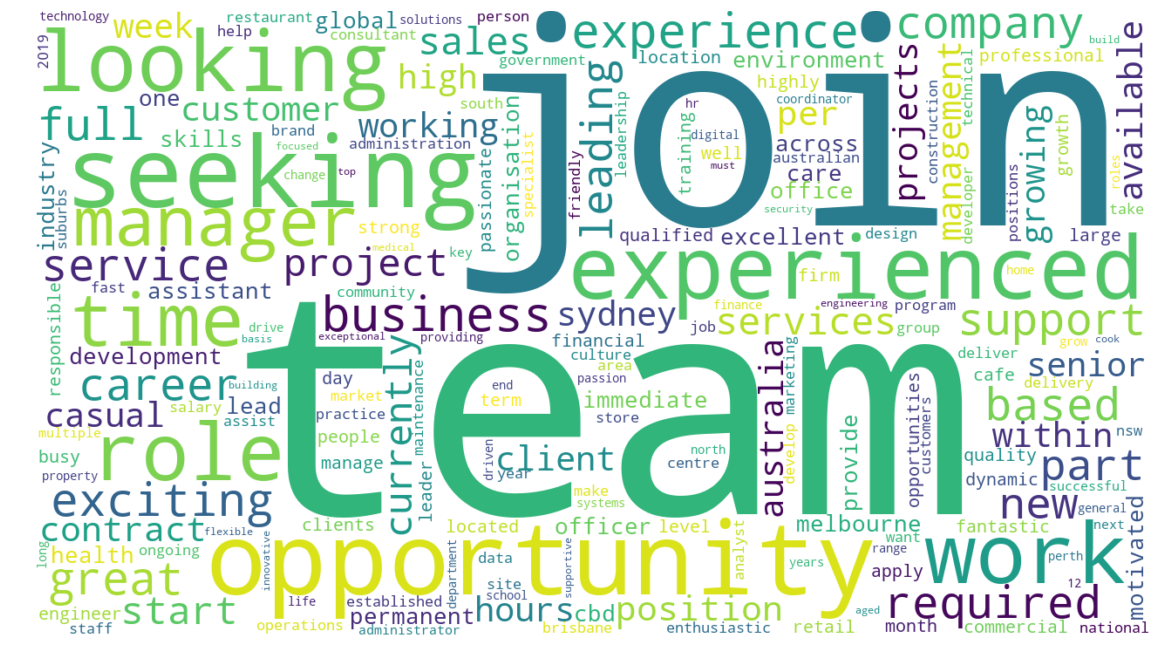

In [168]:
# Visualise
# Convert freq list to dict
freq_dict = {x: y for x,y in freq}

freq_dict.items()
word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
word_cloud.generate_from_frequencies(freq_dict)

plt.figure(figsize=(20,20))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
# Get a list of classification keys
class_keys = df[df['Classification'].isna() == False]['Classification'].unique()
requirements_dict = dict()
requirements_cnt = dict()

# Iterate over the list of unique classifications, and add the corresponding requirements to a dictionary
print('Job counts per sector:')
for key in class_keys:
    new_data = [data['Requirement'].strip() for index, data in df[(df['Requirement'].isna() == False) & (df['Classification'] == key)].iterrows()]
    print(key,': ',len(new_data),sep='')
    requirements_dict[key] = new_data
    requirements_cnt[key] = len(new_data)

# Example requirements
requirements_dict['Retail & Consumer Products'][:5]

Job counts per sector:
Retail & Consumer Products: 8041
Call Centre & Customer Service: 3971
Hospitality & Tourism: 15523
Banking & Financial Services: 4633
Manufacturing, Transport & Logistics: 12376
Sales: 8119
Administration & Office Support: 10020
Trades & Services: 17976
Accounting: 9368
Real Estate & Property: 3614
Healthcare & Medical: 17085
Marketing & Communications: 3968
Government & Defence: 7441
Information & Communication Technology: 22796
Education & Training: 9280
Community Services & Development: 4483
Mining, Resources & Energy: 6288
Human Resources & Recruitment: 4144
Insurance & Superannuation: 1474
Engineering: 6458
CEO & General Management: 844
Design & Architecture: 1811
Legal: 4237
Construction: 8372
Sport & Recreation: 984
Science & Technology: 905
Advertising, Arts & Media: 833
Farming, Animals & Conservation: 882
Self Employment: 93
Consulting & Strategy: 1206


['Our Casual Stock Replenishers pride themselves on filling&#8232; shelves faster than anyone else in the industry.',
 'Our Casual Stock Replenishers pride themselves on filling &#8232;shelves faster than anyone else in the industry.',
 'BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA',
 'Bring it on - do you love the great outdoors and want to work with like minded people?  We are on the lookout for new team members to join our busines',
 'We currently have an exciting part-time opportunity for a motivated and sales focussed individual to join our team at our Adelaide store.']

In [49]:
# Dictionary of tf-idf values
tf_idf_dict = dict()

# Perform tf-idf on each sector
for key in class_keys:
    req_analyser = text_analysis.CountVectorizer(stop_words=stop_words,analyzer='word',max_features=200)
    req_tf = req_analyser.fit_transform(requirements_dict[key])
    
    # Calculate tf-idf values
    req_analysis_transformer = text_analysis.TfidfTransformer(use_idf=True)
    req_tfidf = req_analysis_transformer.fit_transform(req_tf)
    
    # Calculate the total for each word after normalization
    totals = req_tfidf.sum(axis=0)

    # Create list of common terms with their tf-idf sum in order from highest to lowest, add to dictionary
    freq = sorted([(word, totals[0, i]) for word, i in req_analyser.vocabulary_.items()], key=lambda x: x[1],reverse=True)
    tf_idf_dict[key] = freq

## VISUALISATION TEST

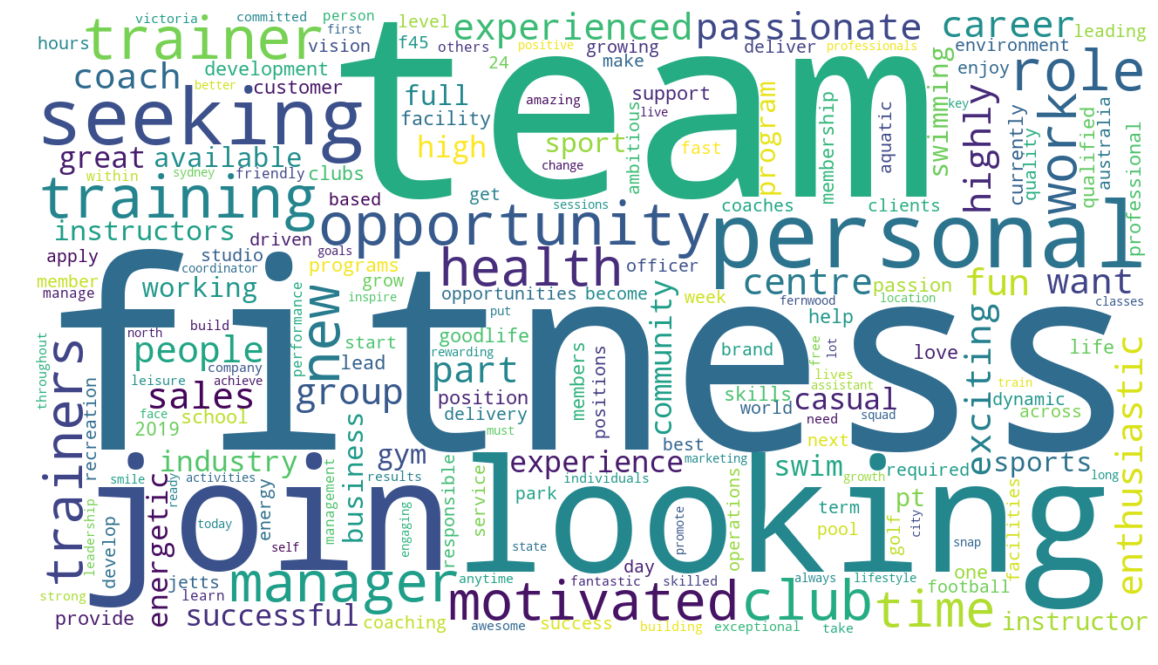

In [65]:
# Visualise TEST
# Convert freq list to dict
freq_dict = {x: y for x,y in tf_idf_dict['Sport & Recreation']}

word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
word_cloud.generate_from_frequencies(freq_dict)

plt.figure(figsize=(20,20))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

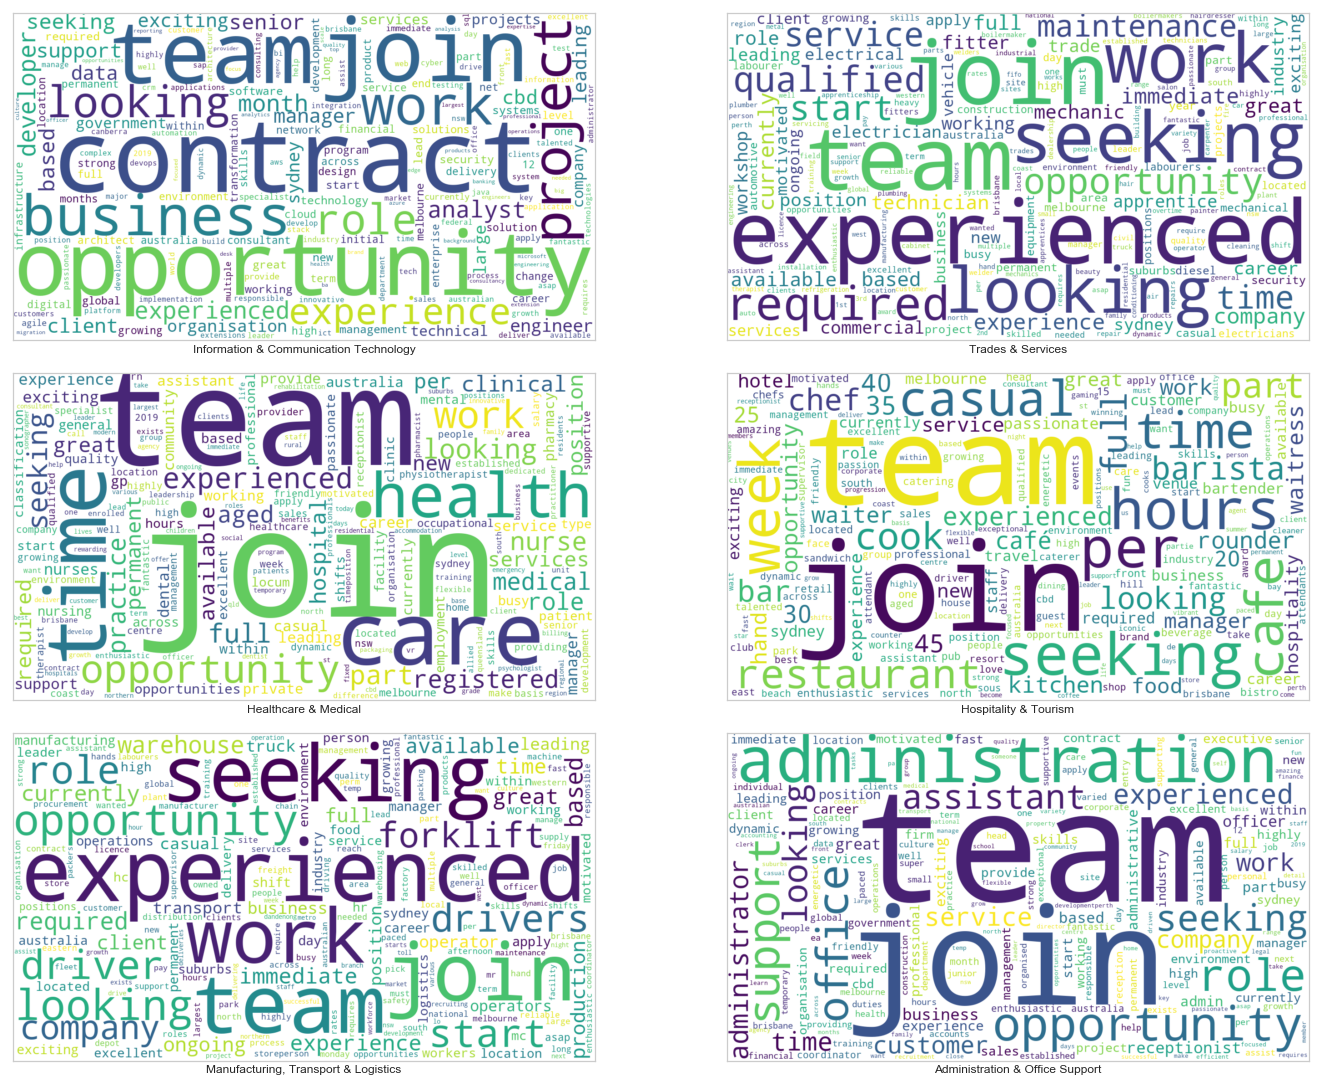

In [83]:
# Plot jobs with highest ad frequencies
plt.figure(figsize=(20,20))

select_keys = [x[0] for x in sorted(requirements_cnt.items(), key = lambda x: x[1], reverse = True)]

for i in range(1,7):
    ax = plt.subplot(4,2,i)
    
    freq_dict = {x: y for x,y in tf_idf_dict[select_keys[i-1]]}

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(freq_dict)
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.xlabel(select_keys[i-1])
    
    plt.imshow(word_cloud,interpolation='bilinear')

plt.tight_layout()
#plt.suptitle('Word Frequencies of Highest Posted Classifications')

From the 